In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("../../data/test_data_10k.csv").drop(columns = "Unnamed: 0")

In [69]:

raw_data.columns

Index(['index', 'Thread ID', 'Date Sent', 'Subject', 'Patient Message',
       'Message Sender', 'Actual Response Sent to Patient', 'Recipient Names',
       'Recipient IDs', 'Message Department', 'Department Specialty Title',
       'Prompt Sent to LLM', 'Suggested Response from LLM',
       'QuickAction Executed'],
      dtype='object')

In [14]:
baseline_df = pd.read_csv("../output_with_batch_size_100/baseline_analysis/final_df.csv")

In [3]:
import pandas as pd
import json

# Simple one-liner version
def simple_parse_jsonl(file_path):
    """Simple function to parse JSONL to DataFrame"""
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line and line != '[]':
                try:
                    json_list = json.loads(line)
                    if json_list:  # Skip empty lists
                        data.append(json_list[0])  # Extract the single object
                except:
                    continue
    return pd.DataFrame(data)

# Usage examples:

# Method 1: Using the function
df = simple_parse_jsonl("../output_with_batch_size_100_with_reference/llm_results.jsonl")
# top_25_keys = df[df["Domain"] == "no error found"]["Suggested Response from LLM"].value_counts().head(25).index.tolist()
# indices_to_remove = [3, 16, 19, 24]
# no_input_lst = [x for i, x in enumerate(top_25_keys) if i not in indices_to_remove]
# cleaned_df = df[~df["Suggested Response from LLM"].isin(no_input_lst)]

In [21]:
cleaned_df = df[df["index"].isin(baseline_df["index"])]

In [19]:
cleaned_df

Patient Message  \
0     HelloMy daughter said she did a stool test so ...   
1     It was through you guys at Palo Alto surgery c...   
2     Refills have been requested for the following ...   
3     Thank you Naoko.   I would like to have the im...   
5     Hi Dr.Young Lee, I called UCSF Nose and Sinus ...   
...                                                 ...   
9958  Good morning, I did make an appointment, but u...   
9960  Hi Wendy, so sorry I have no idea how I didn’t...   
9961  We’re trying to Get some relief with our month...   
9962  She actually wants to conduct next week's sess...   
9963  Hello, I was just in to see Dr. Mughal less th...   

                            Suggested Response from LLM  \
0     Hi Kathleen,\n\nYou can pick up the stool test...   
1     Hi Susan,<10><10>Thank you for the information...   
2     I will reorder your tamsulosin (Flomax) 0.4 mg...   
3     Hi Valerie,<10><10>You're welcome! I have conf...   
5     Hi Linda,<10><10>I'm sorry to hear you're feel...   
...                                                 ...   
9958  Good morning Rebecca,<10><10>Thank you for the...   
9960  Hi Fari,<10><10>Thank you for your kind words!...   
9961  Hello Deborah,<10><10>Thank you for providing ...   
9962  Robert,<10><10>For your remote session next we...   
9963  Hi Lourdes,\n\nI understand that you're feelin...   

                        Actual Response Sent to Patient  \
0     Yes, you can pick the stool sample cup up at t...   
1     Hi Susan,Thank you for your message. Would you...   
2     Hi Mr. Omar,I will reorder your tamsulosin (Fl...   
3     Hi Ms. Cochran,No esophagitis seen on upper en...   
5     The referral has been signed.You will be notif...   
...                                                 ...   
9958  Yes, you are correct.  You ultrasound is norma...   
9960  Hi Fari,Hope you are both doing well. I was ou...   
9961  Hello Deborah,Dr. Gesmundo completed her porti...   
9962  I think a video appointment is fine.  She will...   
9963  Hi Lourdes M West Dr Mughal doesn't have anyth...   

                             Domain                  Subdomain  \
0                    no error found             no error found   
1                    no error found             no error found   
2                    no error found             no error found   
3        Clinical Accuracy & Safety       Information Accuracy   
5                    no error found             no error found   
...                             ...                        ...   
9958  Comprehensiveness & Relevance                    Clarity   
9960  Comprehensiveness & Relevance               Completeness   
9961                 no error found             no error found   
9962                 no error found             no error found   
9963     Clinical Accuracy & Safety  Recommendations & Actions   

                                 Dedup Error Code  \
0                                  no error found   
1                                  no error found   
2                                  no error found   
3              Incorrect Patient Name in Greeting   
5                                  no error found   
...                                           ...   
9958        Ambiguous or Conflicting Instructions   
9960      Incomplete Response to Patient Question   
9961                               no error found   
9962                               no error found   
9963  Incorrect or Unsafe Clinical Recommendation   

                                              Reasoning Confidence   index  
0     Both responses provide the same clinical instr...       High  790356  
1     Both responses appropriately address the patie...       High  614158  
2     Both the suggested and actual responses accura...       High  140719  
3     The patient's message is signed by Valerie, ye...       High  619806  
5     Both the LLM and actual responses appropriatel...       High  360467  
...                  

In [20]:
cleaned_df[["index", "Domain"]].nunique()

index     9457
Domain       8
dtype: int64

In [22]:
df_final = cleaned_df[['Domain', 'Subdomain','Dedup Error Code', 'Reasoning', 'Confidence', 'index']].merge(raw_data, on = ["index"], how = "inner")

In [28]:
df_final.to_csv("../output_with_batch_size_100_with_reference/enhance_analysis/final_df.csv")

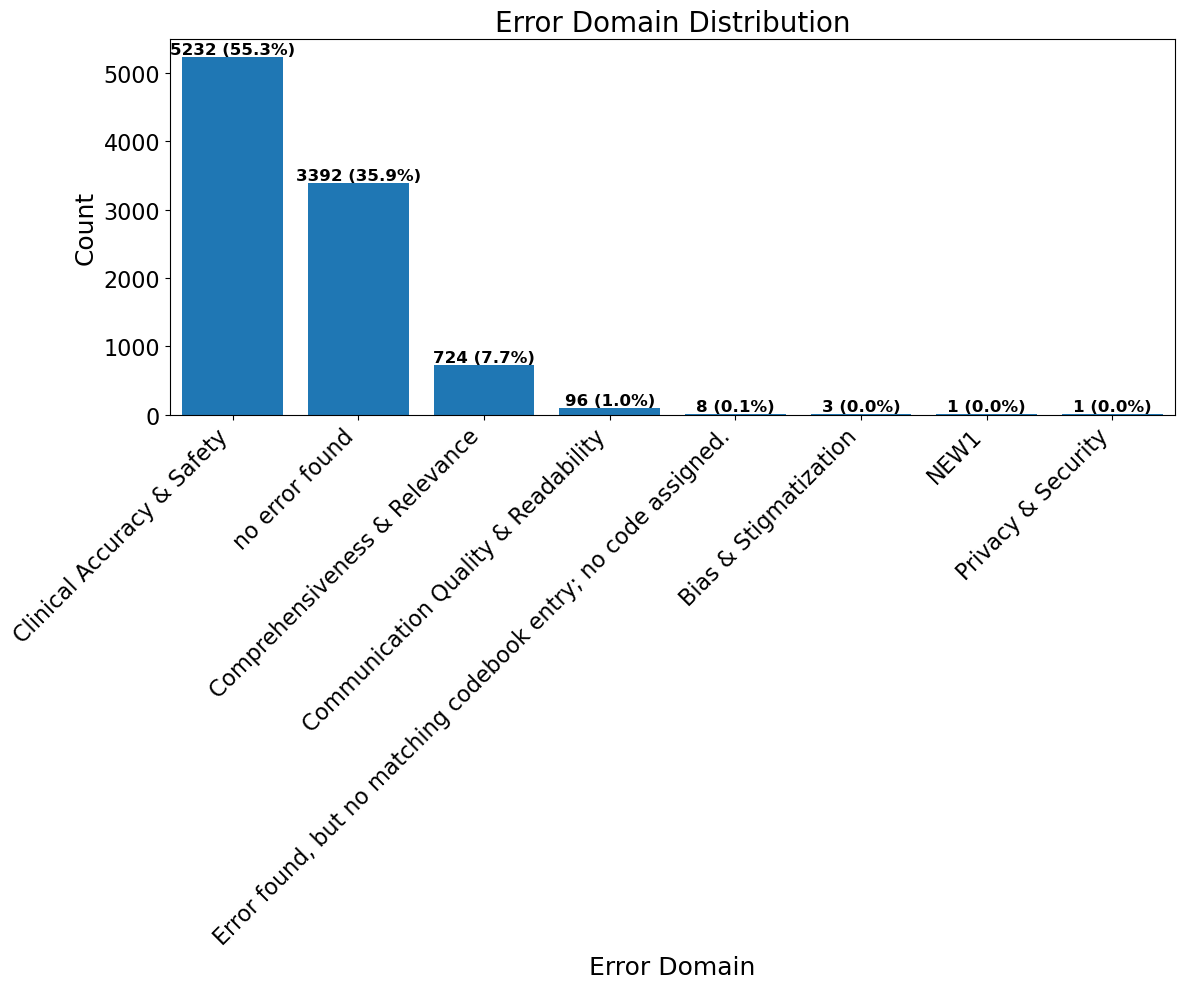

In [29]:
label_counts = df_final["Domain"].value_counts()
total_count = len(df_final)

# Simple bar plot
plt.figure(figsize=(12, 10))
bars = plt.bar(range(len(label_counts)), label_counts.values)
label_counts.plot(kind='bar')
plt.title('Error Domain Distribution', fontsize=20)
plt.xlabel('Error Domain', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
# Add count values and percentages on top of each bar

for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total_count) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)} ({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold', fontsize = 12)

plt.tight_layout()
plt.show()

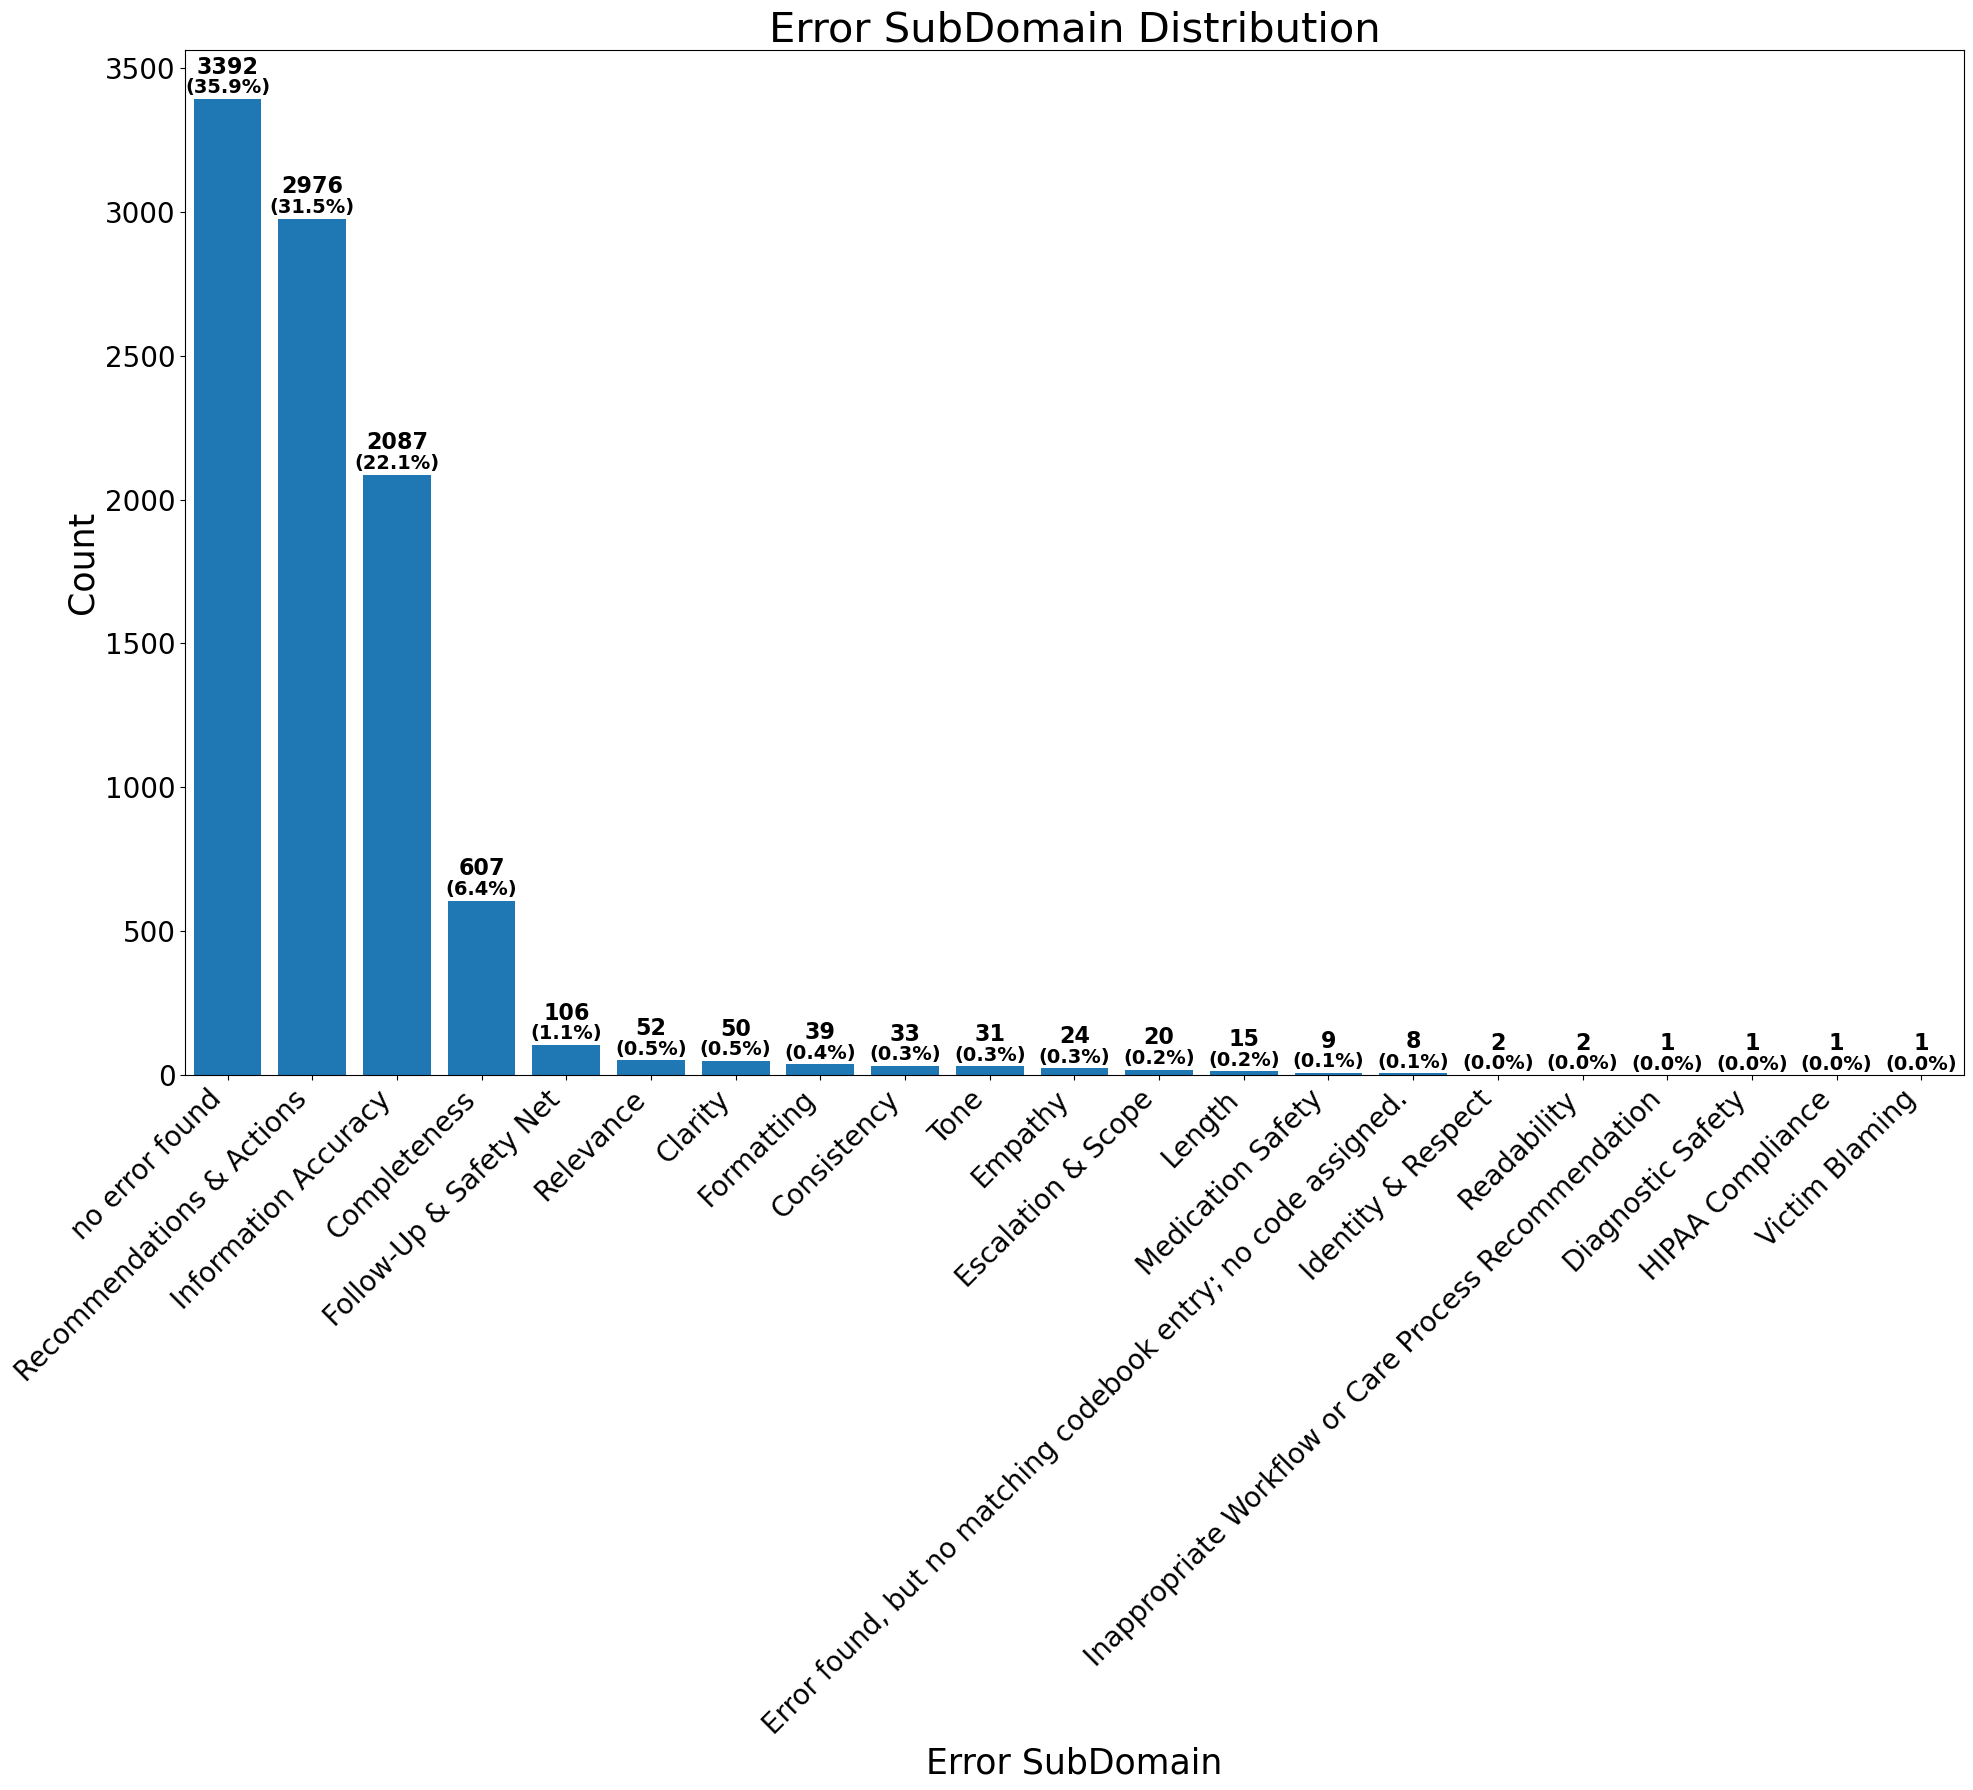

In [30]:
label_counts = df_final["Subdomain"].value_counts()
total_count = len(df_final)

# Simple bar plot
plt.figure(figsize=(20, 18))
bars = plt.bar(range(len(label_counts)), label_counts.values)
label_counts.plot(kind='bar')
plt.title('Error SubDomain Distribution', fontsize=30)
plt.xlabel('Error SubDomain', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)

# Add count values and percentages on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total_count) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 70,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=16)
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

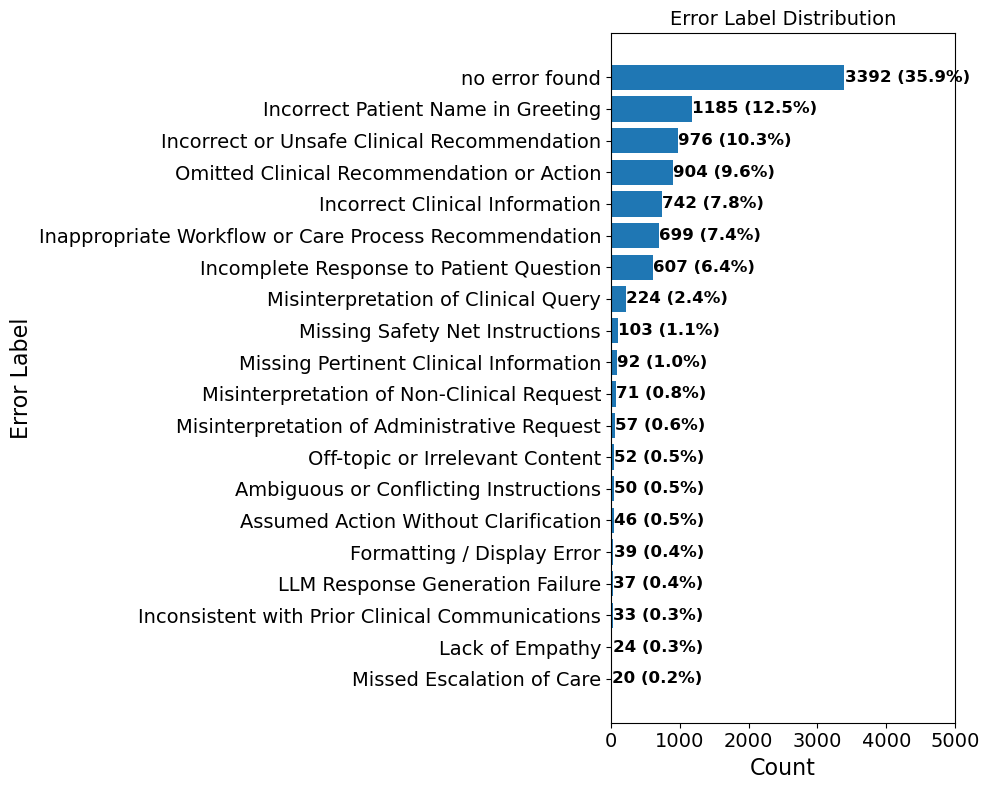

In [31]:
# label_counts = df_final['Dedup Error Code'].value_counts().head(20)
# total_count = len(df_final)

# # Reverse the order to show highest count at top
# label_counts_reversed = label_counts[::-1]

# # Horizontal bar plot
# plt.figure(figsize=(10, 8))
# bars = plt.barh(range(len(label_counts_reversed)), label_counts_reversed.values)
# plt.title('Error Label Distribution')
# plt.xlabel('Count')
# plt.ylabel('Error Label')
# plt.yticks(range(len(label_counts_reversed)), label_counts_reversed.index)
# # Add count values on the right side of bars
# for i, bar in enumerate(bars):
#     width = bar.get_width()
#     percentage = (width / total_count) * 100
#     plt.text(width + 1, bar.get_y() + bar.get_height()/2,
#              f'{int(width)} ({percentage:.1f}%)', ha='left', va='center', fontweight='bold')

# plt.tight_layout()
# plt.show()
label_counts = df_final['Dedup Error Code'].value_counts().head(20)
total_count = len(df_final)

# Reverse the order to show highest count at top
label_counts_reversed = label_counts[::-1]

# Horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(label_counts_reversed)), label_counts_reversed.values)
plt.title('Error Label Distribution', fontsize=14)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Error Label', fontsize=16)
plt.yticks(range(len(label_counts_reversed)), label_counts_reversed.index, fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0, 5000) 

# Add count values on the right side of bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    percentage = (width / total_count) * 100
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)} ({percentage:.1f}%)', ha='left', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

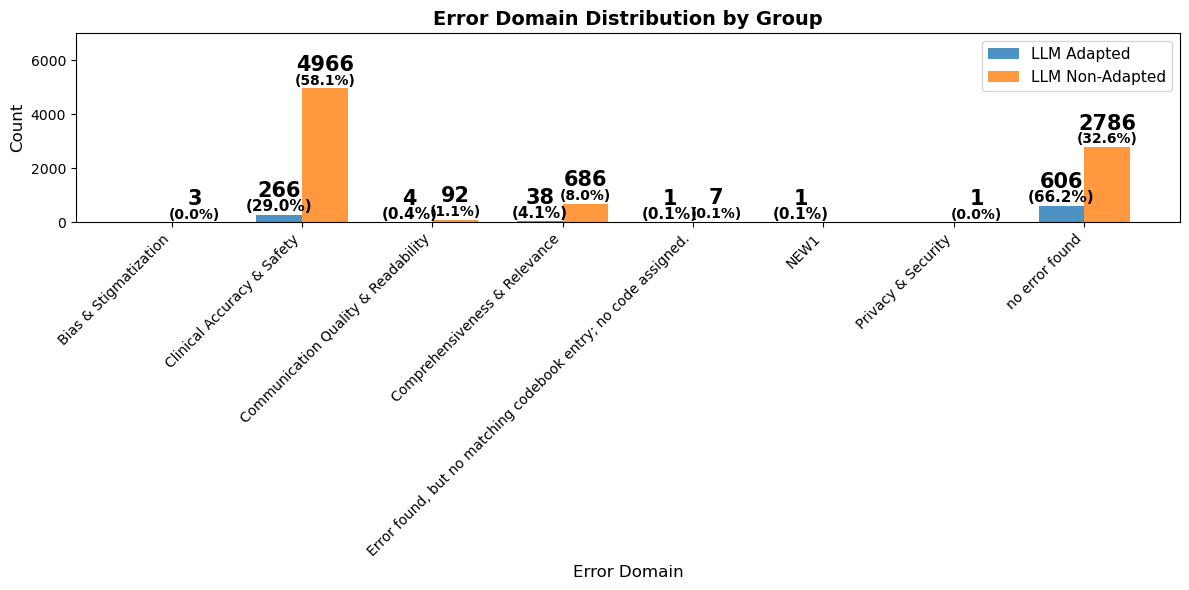

In [32]:
# Create the two groups
group_20000 = df_final[df_final['QuickAction Executed'] == 20000]
group_other = df_final[df_final['QuickAction Executed'] != 20000]

# Get value counts for each group
counts_20000 = group_20000['Domain'].value_counts()
counts_other = group_other['Domain'].value_counts()

# Create a common index with all unique labels
all_labels = sorted(set(counts_20000.index) | set(counts_other.index))
counts_20000_aligned = counts_20000.reindex(all_labels, fill_value=0)
counts_other_aligned = counts_other.reindex(all_labels, fill_value=0)

# Calculate percentages for each group
total_20000 = counts_20000_aligned.sum()
total_other = counts_other_aligned.sum()
percentages_20000 = (counts_20000_aligned / total_20000 * 100).round(1)
percentages_other = (counts_other_aligned / total_other * 100).round(1)

# Create side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(all_labels))

width = 0.35

bars1 = ax.bar([i - width/2 for i in x], counts_20000_aligned.values, width, label='LLM Adapted', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], counts_other_aligned.values, width, label='LLM Non-Adapted', alpha=0.8)

# Add value labels on bars with percentages underneath
for i, bar in enumerate(bars1):
    height = bar.get_height()
    if height > 0:  # Only show labels for non-zero values
        # Count label - positioned just above the bar
        ax.text(bar.get_x() + bar.get_width()/2., height + 500,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=15)
        # Percentage label - positioned below the count
        ax.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'({percentages_20000.iloc[i]}%)', ha='center', va='bottom', fontweight='bold', fontsize=11)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    if height > 0:  # Only show labels for non-zero values
        # Count label - positioned just above the bar
        ax.text(bar.get_x() + bar.get_width()/2., height + 500,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=15)
        # Percentage label - positioned below the count
        ax.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'({percentages_other.iloc[i]}%)', ha='center', va='bottom', fontweight='bold',fontsize=10)

ax.set_xlabel('Error Domain', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Error Domain Distribution by Group', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=11)
plt.ylim(0, 7000) 
plt.tight_layout()
plt.show()

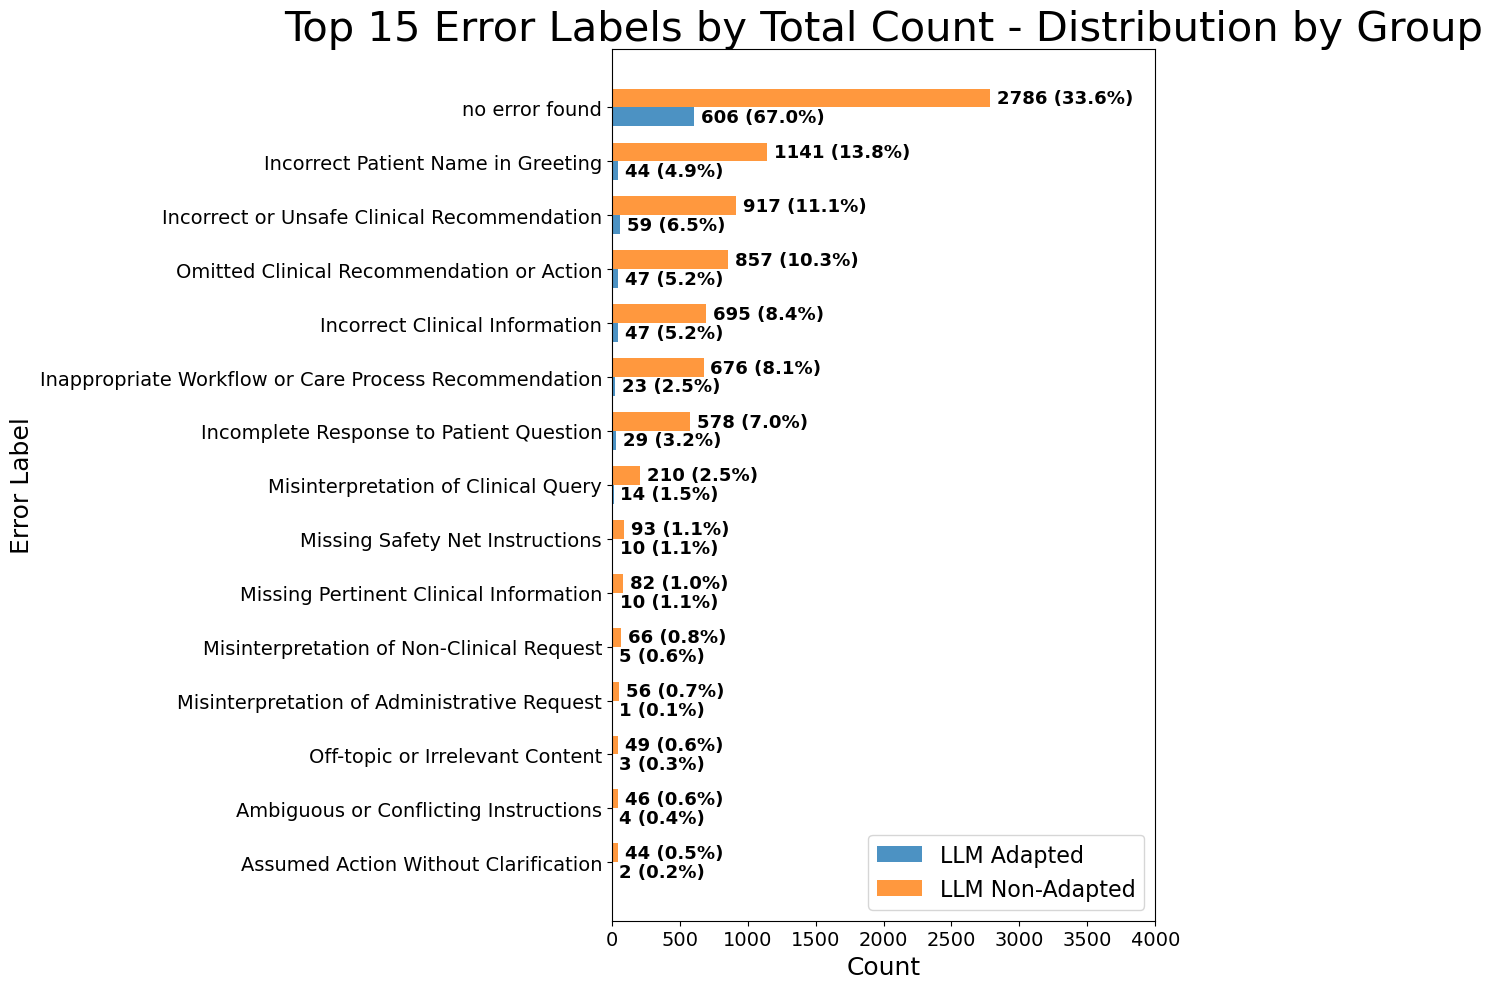

In [33]:
# # Create the two groups
# group_20000 = df_final[df_final['QuickAction Executed'] == 20000]
# group_other = df_final[df_final['QuickAction Executed'] != 20000]

# # Get value counts for each group
# counts_20000 = group_20000['Dedup Error Code'].value_counts()
# counts_other = group_other['Dedup Error Code'].value_counts()

# # Create a common index with all unique labels
# all_labels = sorted(set(counts_20000.index) | set(counts_other.index))
# counts_20000_aligned = counts_20000.reindex(all_labels, fill_value=0)
# counts_other_aligned = counts_other.reindex(all_labels, fill_value=0)

# # Calculate total counts for sorting
# total_counts = counts_20000_aligned + counts_other_aligned

# # Sort by total counts and keep top 15
# top_15_indices = total_counts.nlargest(15).index
# counts_20000_top15 = counts_20000_aligned.loc[top_15_indices]
# counts_other_top15 = counts_other_aligned.loc[top_15_indices]

# # Calculate percentages
# total_20000 = counts_20000_top15.sum()
# total_other = counts_other_top15.sum()
# percentages_20000 = (counts_20000_top15 / total_20000 * 100).round(1)
# percentages_other = (counts_other_top15 / total_other * 100).round(1)

# # Create horizontal side-by-side bar chart
# fig, ax = plt.subplots(figsize=(12, 10))

# y = range(len(top_15_indices))
# height = 0.35

# bars1 = ax.barh([i - height/2 for i in y], counts_20000_top15.values, height, label='LLM Adapted', alpha=0.8)
# bars2 = ax.barh([i + height/2 for i in y], counts_other_top15.values, height, label='LLM Non-Adapted', alpha=0.8)

# # Add value labels on bars
# for i, bar in enumerate(bars1):
#     width = bar.get_width()
#     if width > 0:  # Only add labels for non-zero values
#         count_text = f'{int(width)}'
#         percent_text = f'({percentages_20000.iloc[i]}%)'
#         ax.text(width + 50, bar.get_y() + bar.get_height()/2,
#                 f'{count_text} {percent_text}', ha='left', va='center', 
#                 fontweight='bold', fontsize=13)

# for i, bar in enumerate(bars2):
#     width = bar.get_width()
#     if width > 0:  # Only add labels for non-zero values
#         count_text = f'{int(width)}'
#         percent_text = f'({percentages_other.iloc[i]}%)'
#         ax.text(width + 50, bar.get_y() + bar.get_height()/2,
#                 f'{count_text} {percent_text}', ha='left', va='center', 
#                 fontweight='bold', fontsize=13)

# ax.set_ylabel('Error Label', fontsize = 18)
# ax.set_xlabel('Count', fontsize = 18)
# ax.set_title('Top 15 Error Labels by Total Count - Distribution by Group', fontsize = 30)
# ax.set_yticks(y)
# ax.set_yticklabels(top_15_indices, fontsize=14)
# plt.xlim(0,4000)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# ax.legend()
# plt.tight_layout()
# plt.show()
# Create the two groups
# Create the two groups
group_20000 = df_final[df_final['QuickAction Executed'] == 20000]
group_other = df_final[df_final['QuickAction Executed'] != 20000]

# Get value counts for each group
counts_20000 = group_20000['Dedup Error Code'].value_counts()
counts_other = group_other['Dedup Error Code'].value_counts()

# Create a common index with all unique labels
all_labels = sorted(set(counts_20000.index) | set(counts_other.index))
counts_20000_aligned = counts_20000.reindex(all_labels, fill_value=0)
counts_other_aligned = counts_other.reindex(all_labels, fill_value=0)

# Calculate total counts for sorting
total_counts = counts_20000_aligned + counts_other_aligned

# Sort by total counts and keep top 15, then reverse the order
top_15_indices = total_counts.nlargest(15).index[::-1]  # Reverse the order
counts_20000_top15 = counts_20000_aligned.loc[top_15_indices]
counts_other_top15 = counts_other_aligned.loc[top_15_indices]

# Calculate percentages
total_20000 = counts_20000_top15.sum()
total_other = counts_other_top15.sum()
percentages_20000 = (counts_20000_top15 / total_20000 * 100).round(1)
percentages_other = (counts_other_top15 / total_other * 100).round(1)

# Create horizontal side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 10))

y = range(len(top_15_indices))
height = 0.35

bars1 = ax.barh([i - height/2 for i in y], counts_20000_top15.values, height, label='LLM Adapted', alpha=0.8)
bars2 = ax.barh([i + height/2 for i in y], counts_other_top15.values, height, label='LLM Non-Adapted', alpha=0.8)

# Add value labels on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    if width > 0:  # Only add labels for non-zero values
        count_text = f'{int(width)}'
        percent_text = f'({percentages_20000.iloc[i]}%)'
        ax.text(width + 50, bar.get_y() + bar.get_height()/2,
                f'{count_text} {percent_text}', ha='left', va='center', 
                fontweight='bold', fontsize=13)

for i, bar in enumerate(bars2):
    width = bar.get_width()
    if width > 0:  # Only add labels for non-zero values
        count_text = f'{int(width)}'
        percent_text = f'({percentages_other.iloc[i]}%)'
        ax.text(width + 50, bar.get_y() + bar.get_height()/2,
                f'{count_text} {percent_text}', ha='left', va='center', 
                fontweight='bold', fontsize=13)

ax.set_ylabel('Error Label', fontsize = 18)
ax.set_xlabel('Count', fontsize = 18)
ax.set_title('Top 15 Error Labels by Total Count - Distribution by Group', fontsize = 30)
ax.set_yticks(y)
ax.set_yticklabels(top_15_indices, fontsize=14)
plt.xlim(0,4000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize = 16)
plt.tight_layout()
plt.show()

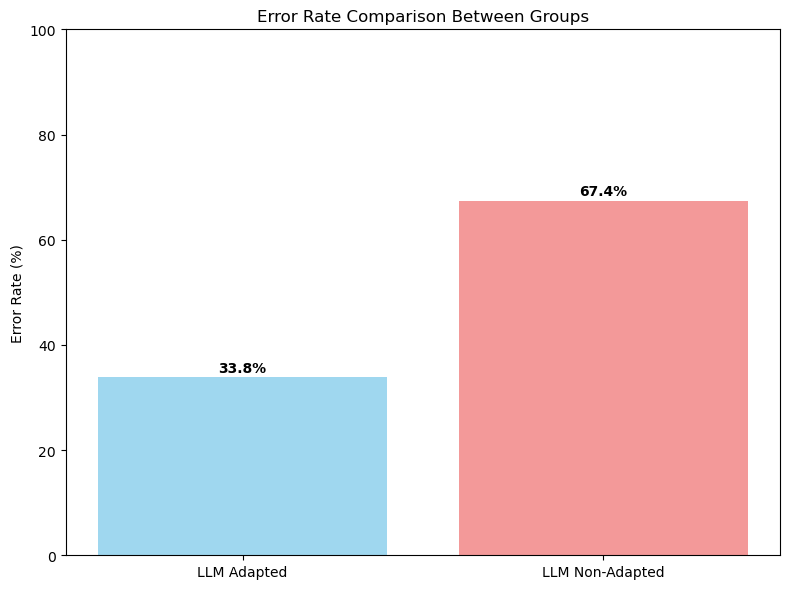

Error Rate for LLM Adapted: 33.8%
Error Rate for LLM Non-Adapted: 67.4%


In [34]:
# Create the two groups
group_20000 = df_final[df_final['QuickAction Executed'] == 20000]
group_other = df_final[df_final['QuickAction Executed'] != 20000]

# Calculate N/A rates for each group
na_rate_20000 = (group_20000["Dedup Error Code"] == "no error found").mean() * 100
na_rate_other = (group_other["Dedup Error Code"] == "no error found").mean() * 100

# Calculate 1 - N/A rate (rate of non-N/A values)
non_na_rate_20000 = 100 - na_rate_20000
non_na_rate_other = 100 - na_rate_other

# Create bar chart for non-N/A rates
fig, ax = plt.subplots(figsize=(8, 6))

groups = ['LLM Adapted', 'LLM Non-Adapted']
rates = [non_na_rate_20000, non_na_rate_other]
colors = ['skyblue', 'lightcoral']

bars = ax.bar(groups, rates, color=colors, alpha=0.8)

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Error Rate (%)')
ax.set_title('Error Rate Comparison Between Groups')
ax.set_ylim(0, 100)  # Set y-axis limit to 100%

plt.tight_layout()
plt.show()

# Print the actual values
print(f"Error Rate for LLM Adapted: {non_na_rate_20000:.1f}%")
print(f"Error Rate for LLM Non-Adapted: {non_na_rate_other:.1f}%")

In [35]:
df_final

Domain                  Subdomain  \
0                    no error found             no error found   
1                    no error found             no error found   
2                    no error found             no error found   
3        Clinical Accuracy & Safety       Information Accuracy   
4                    no error found             no error found   
...                             ...                        ...   
9452  Comprehensiveness & Relevance                    Clarity   
9453  Comprehensiveness & Relevance               Completeness   
9454                 no error found             no error found   
9455                 no error found             no error found   
9456     Clinical Accuracy & Safety  Recommendations & Actions   

                                 Dedup Error Code  \
0                                  no error found   
1                                  no error found   
2                                  no error found   
3              Incorrect Patient Name in Greeting   
4                                  no error found   
...                                           ...   
9452        Ambiguous or Conflicting Instructions   
9453      Incomplete Response to Patient Question   
9454                               no error found   
9455                               no error found   
9456  Incorrect or Unsafe Clinical Recommendation   

                                              Reasoning Confidence   index  \
0     Both responses provide the same clinical instr...       High  790356   
1     Both responses appropriately address the patie...       High  614158   
2     Both the suggested and actual responses accura...       High  140719   
3     The patient's message is signed by Valerie, ye...       High  619806   
4     Both the LLM and actual responses appropriatel...       High  360467   
...                                                 ...        ...     ...   
9452  Although both responses confirm that the ultra...       High  461382   
9453  The patient’s message raises multiple specific...       High  230606   
9454  Both the Suggested and Actual responses approp...       High  167125   
9455  Both the suggested and actual responses indica...       High   83618   
9456  The patient requested a short-term prescriptio...       High   91941   

      Thread ID   Date Sent                          Subject  \
0     248500172  2024-10-23  RE: Non-urgent Medical Question   
1     250057249  2024-11-07         RE:Ordered Test Question   
2     254069620  2024-12-23            Prescription Question   
3     248253444  2024-11-07      RE:Visit Follow-up Question   
4     251519083  2024-12-03                   RE: Urine test   
...         ...         ...                              ...   
9452  250712115  2024-11-21                    RE: Follow up   
9453  252054965  2024-12-13  RE: Non-urgent Medical Question   
9454  253782163  2024-12-19  RE: Non-urgent Medical Question   
9455  254497010  2024-12-30        RE:New Biopsy Information   
9456  254420249  2024-12-30        RE: Prescription Question   

                                        Patient Message  \
0     HelloMy daughter said she did a stool test so ...   
1     It was through you guys at Palo Alto surgery c...   
2     Refills have been requested for the following ...   
3     Thank you Naoko.   I would like to have the im...   
4     Hi Dr.Young Lee,I called UCSF Nose and Sinus a...   
...                                                 ...   
9452  Good morning, I did make an appointment, but u...   
9453  Hi Wendy, so sorry I have no idea how I didn’t...   
9454  We’re trying to Get some relief with our month...   
9455  She actually wants to conduct next week's sess...   
9456  Hello, I was just in to see Dr. Mughal less th...   

                     Message Sender  \
0       MYCHART, GENERIC [ T200162]   
1       MYCHART, GENERIC [ T200162]   
2          MOTA, YUNICE [ S0205383]   
3     VAZQUEZ, BRITTANY [ S0

In [39]:
baseline_df

Domain                  Subdomain  \
0     Clinical Accuracy & Safety       Information Accuracy   
1                 no error found             no error found   
2                 no error found             no error found   
3                 no error found             no error found   
4                 no error found             no error found   
...                          ...                        ...   
9480  Clinical Accuracy & Safety       Information Accuracy   
9481  Clinical Accuracy & Safety  Recommendations & Actions   
9482  Clinical Accuracy & Safety       Information Accuracy   
9483              no error found             no error found   
9484  Clinical Accuracy & Safety       Information Accuracy   

                               Dedup Error Code  \
0            Incorrect Patient Name in Greeting   
1                                no error found   
2                                no error found   
3                                no error found   
4                                no error found   
...                                         ...   
9480         Incorrect Patient Name in Greeting   
9481  Omitted Clinical Recommendation or Action   
9482         Incorrect Patient Name in Greeting   
9483                             no error found   
9484         Incorrect Patient Name in Greeting   

                                              Reasoning Confidence   index  \
0     The patient identified herself as Valerie. Whi...       High  619806   
1     Both the LLM suggested response and the actual...       High  651639   
2     Both the LLM response and the actual response ...       High  210977   
3     The patient's query about a high Vitamin B12 l...       High  380327   
4     Both the LLM and the actual response appropria...       High  614158   
...                                                 ...        ...     ...   
9480  Both the LLM and the actual response address t...       High  222358   
9481  The patient message contains specific clinical...       High  110523   
9482  The patient message is sent on behalf of Chase...       High  707666   
9483  Both the LLM and the actual response acknowled...       High  731350   
9484  The LLM-generated response incorrectly address...       High  508205   

      Thread ID   Date Sent                       Subject  \
0     248253444  2024-11-07   RE:Visit Follow-up Question   
1     249729555  2024-11-04           Scheduling Question   
2     253025745  2024-12-16  RE: Visit Follow-up Question   
3     251841187  2024-12-02         Test Results Question   
4     250057249  2024-11-07      RE:Ordered Test Question   
...         ...         ...                           ...   
9480  255551862  2025-01-14           Scheduling Question   
9481  255766301  2025-01-15         Test Results Question   
9482  249329121  2024-10-30         Prescription Question   
9483  249002350  2024-10-28      Visit Follow-up Question   
9484  250529125  2024-11-18          RE:Follow Up Message   

                                        Patient Message  \
0     Thank you Naoko.   I would like to have the im...   
1     Hello all,Need to cancel my appointment for 11...   
2     Thank you. But I have a few more things to ask...   
3     I have a question about Vitamin B12 resulted o...   
4     It was through you guys at Palo Alto surgery c...   
...                                                 ...   
9480  Hi Marina,I have an a growth on my anus that I...   
9481  Hi Alex, Thank you for your message. Dr. Walla...   
9482  This message has been sent by Virginia Matsumo...   
9483  Hi Dr. Lutley, I tried to open (clicked on eve...   
9484  Genetic Testing report can be downloaded in be...   

                        Message Sender  \
0        VAZQUEZ, BRITTANY [ S0375728]   
1          MYCHART, GENERIC [ T200162]   
2      CERVANTEZ, VICTORIA [ S0306062]   
3     GONZALEZ, JACQUELINE [ S0376090]   
4          MYCHART, GENERIC [ T200162]   
...                      

In [40]:
merged_df_comparison =  baseline_df.merge(df_final, how = "inner", on = "index",suffixes=("_baseline", "_enhance"))

In [ ]:
# merged_df_comparison.to_csv("../data/baseline_enhance_merged_final_df.csv")

In [44]:
merged_df_comparison.columns

Index(['Domain_baseline', 'Subdomain_baseline', 'Dedup Error Code_baseline',
       'Reasoning_baseline', 'Confidence_baseline', 'index',
       'Thread ID_baseline', 'Date Sent_baseline', 'Subject_baseline',
       'Patient Message_baseline', 'Message Sender_baseline',
       'Actual Response Sent to Patient_baseline', 'Recipient Names_baseline',
       'Recipient IDs_baseline', 'Message Department_baseline',
       'Department Specialty Title_baseline', 'Prompt Sent to LLM_baseline',
       'Suggested Response from LLM_baseline', 'QuickAction Executed_baseline',
       'Domain_enhance', 'Subdomain_enhance', 'Dedup Error Code_enhance',
       'Reasoning_enhance', 'Confidence_enhance', 'Thread ID_enhance',
       'Date Sent_enhance', 'Subject_enhance', 'Patient Message_enhance',
       'Message Sender_enhance', 'Actual Response Sent to Patient_enhance',
       'Recipient Names_enhance', 'Recipient IDs_enhance',
       'Message Department_enhance', 'Department Specialty Title_enhance',


# comparison between baseline and comparison

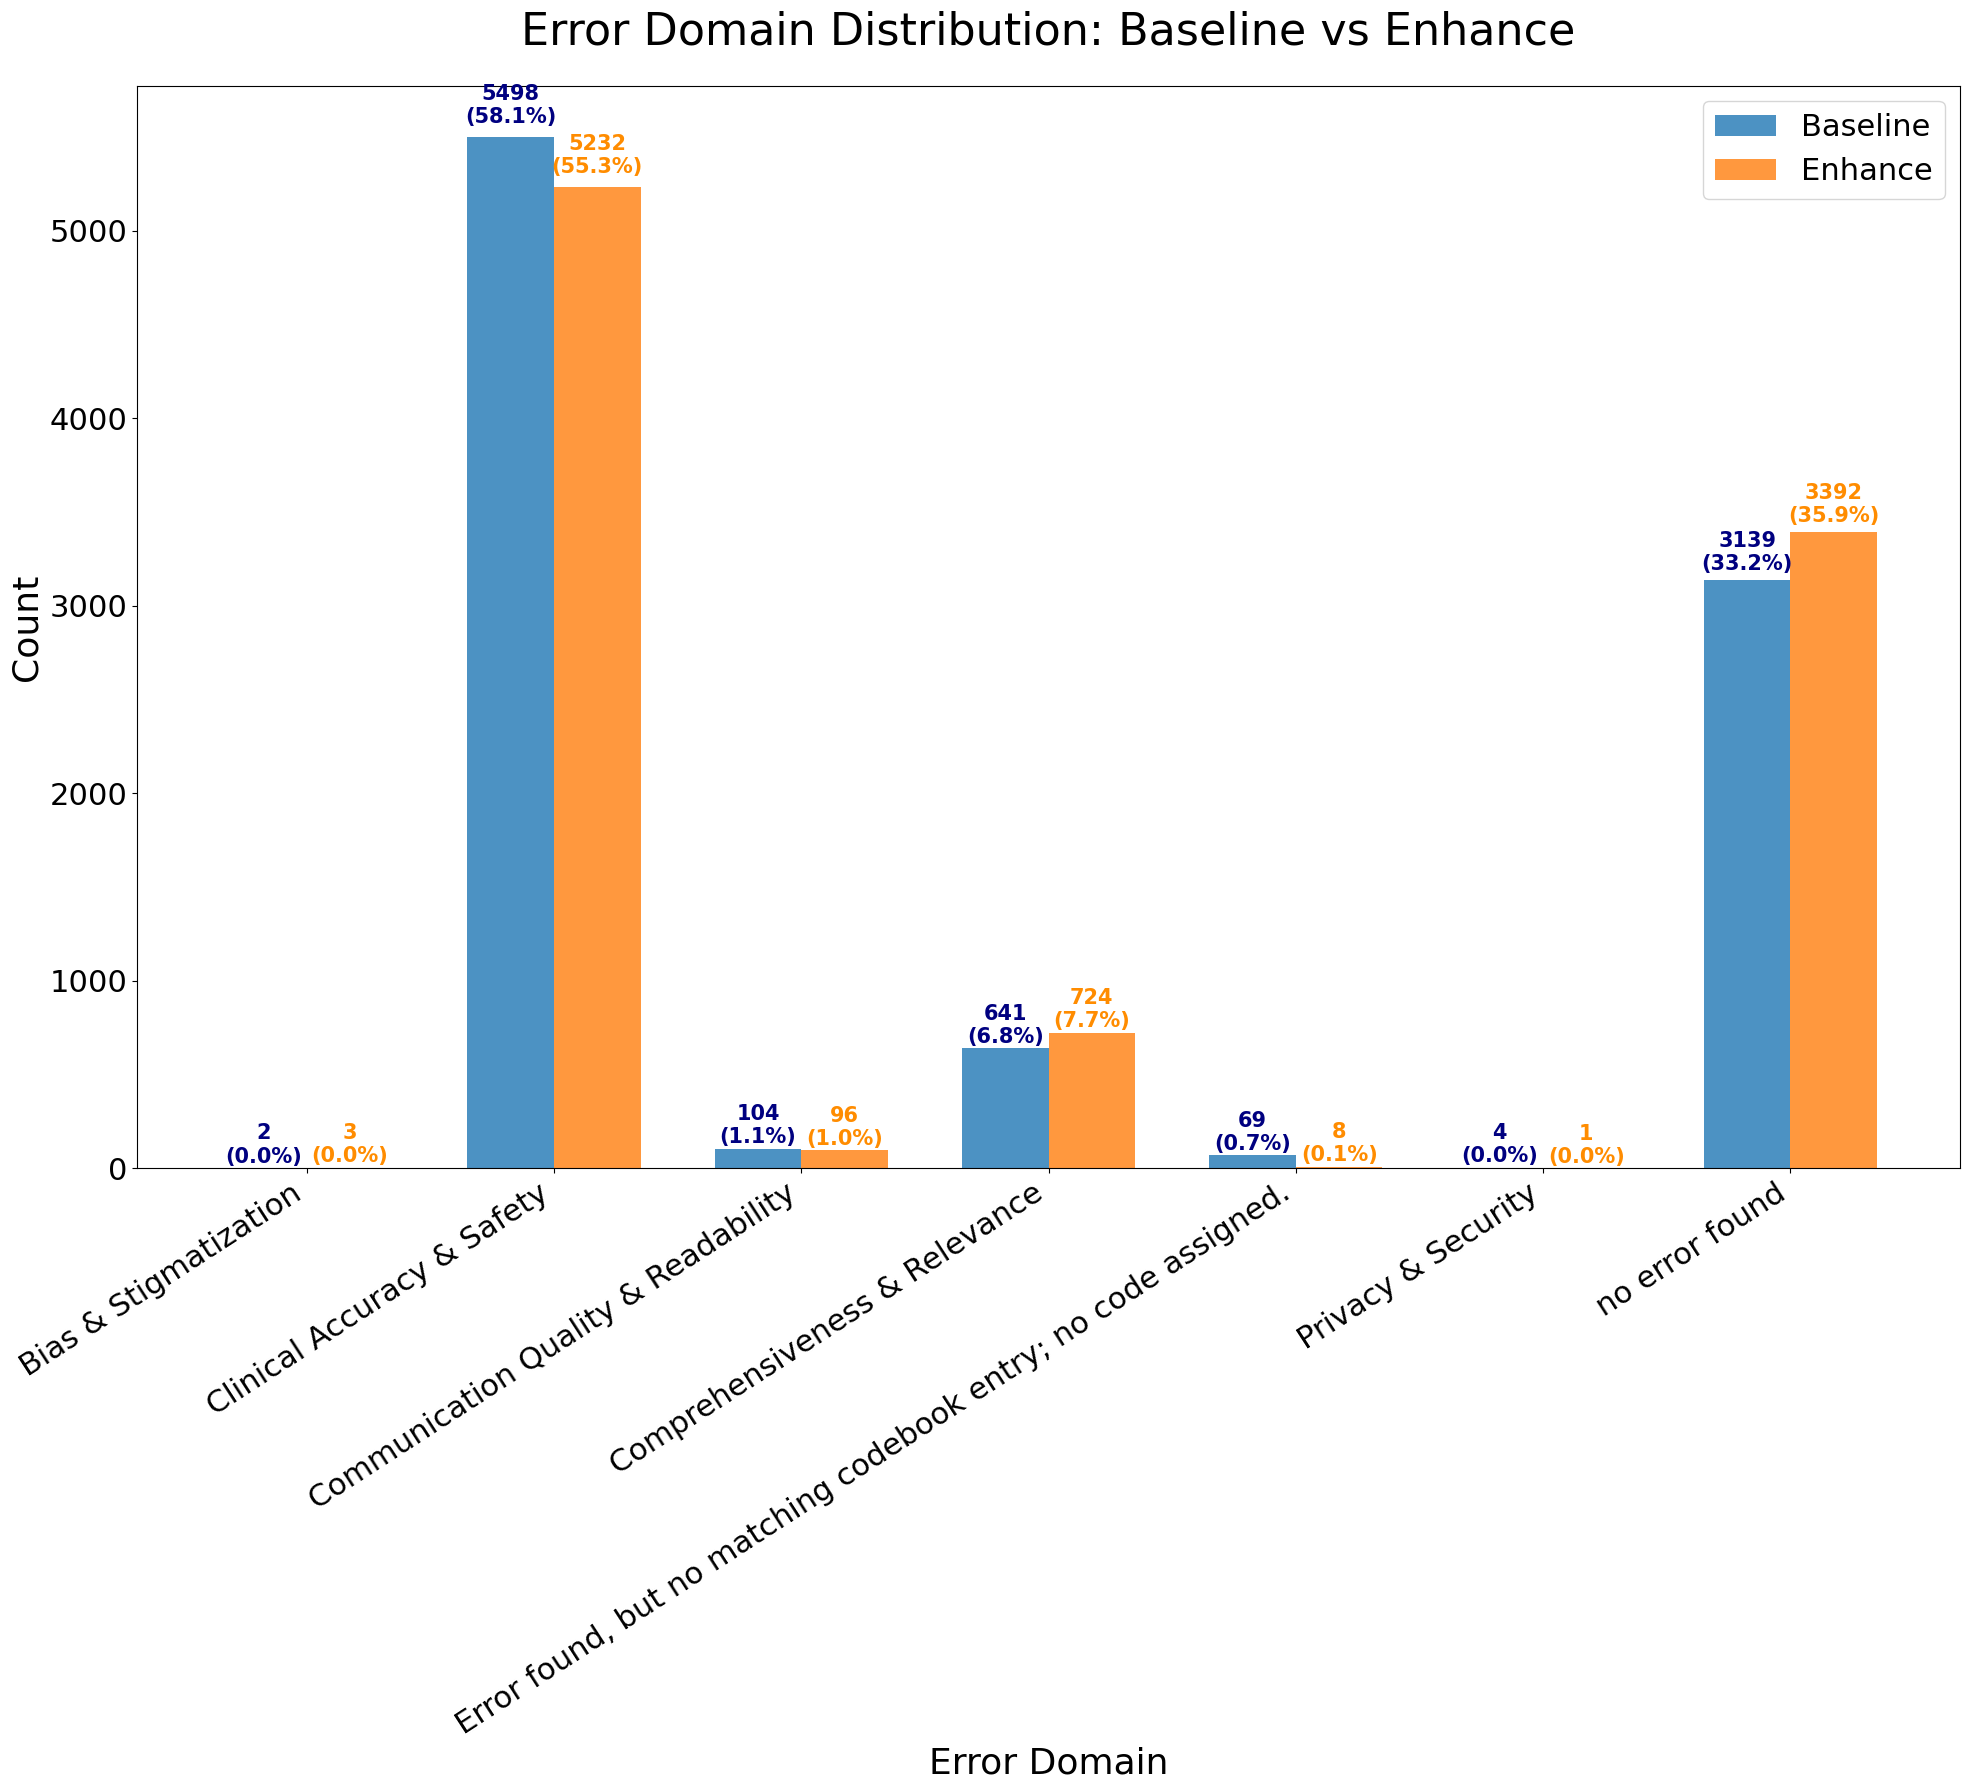

In [53]:
import matplotlib.pyplot as plt

# Value counts
counts_baseline = merged_df_comparison['Domain_baseline'].value_counts()
counts_enhance  = merged_df_comparison['Domain_enhance'].value_counts()

# Drop "NEW1"
counts_baseline = counts_baseline.drop("NEW1", errors="ignore")
counts_enhance  = counts_enhance.drop("NEW1", errors="ignore")

# Unique domains (no NEW1)
all_domains = sorted(set(counts_baseline.index) | set(counts_enhance.index))
counts_baseline = counts_baseline.reindex(all_domains, fill_value=0)
counts_enhance  = counts_enhance.reindex(all_domains, fill_value=0)

# For percentage
total_baseline = counts_baseline.sum()
total_enhance  = counts_enhance.sum()

x = range(len(all_domains))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 18))  # Even larger plot for big text!
bars1 = ax.bar([i - width/2 for i in x], counts_baseline.values, width, label='Baseline', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], counts_enhance.values,  width, label='Enhance',  alpha=0.8)

ax.set_xlabel('Error Domain', fontsize=26)
ax.set_ylabel('Count', fontsize=26)
ax.set_title('Error Domain Distribution: Baseline vs Enhance', fontsize=32, pad=30)
ax.set_xticks(x)
ax.set_xticklabels(all_domains, rotation=33, ha='right', fontsize=22)
ax.legend(fontsize=22)
ax.tick_params(axis='y', labelsize=22)

# Add count and percentage labels (large)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    percent = (height / total_baseline) * 100 if total_baseline > 0 else 0
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height + max(8, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2):
    height = bar.get_height()
    percent = (height / total_enhance) * 100 if total_enhance > 0 else 0
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height + max(8, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='darkorange')

plt.tight_layout()
plt.show()


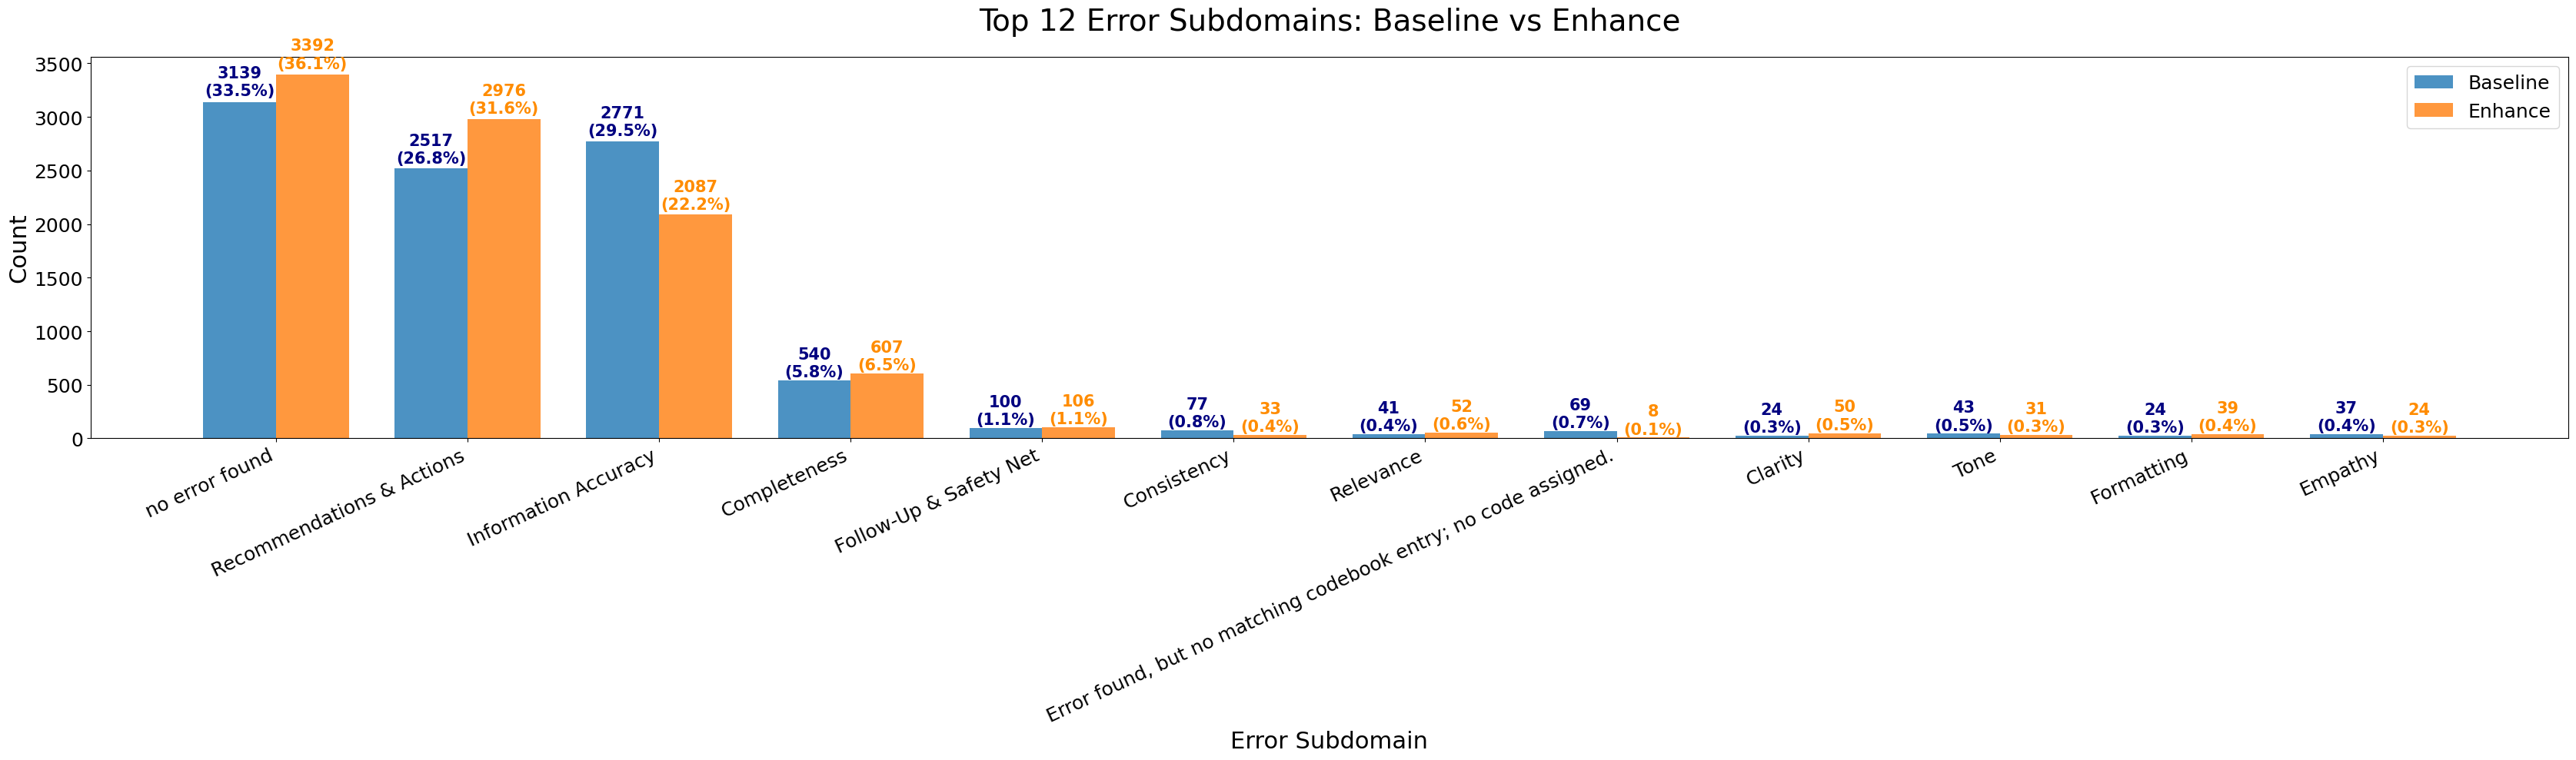

In [68]:

import matplotlib.pyplot as plt
import numpy as np

# Calculate top N subdomains across both groups
N = 12  # Try N=10 or N=12 for best clarity!
counts_baseline = merged_df_comparison['Subdomain_baseline'].value_counts()
counts_enhance  = merged_df_comparison['Subdomain_enhance'].value_counts()
counts_baseline = counts_baseline.drop("NEW1", errors="ignore")
counts_enhance  = counts_enhance.drop("NEW1", errors="ignore")
all_counts = counts_baseline.add(counts_enhance, fill_value=0)
topN_subdomains = all_counts.nlargest(N).index.tolist()

# Align and select only the top N
counts_baseline = counts_baseline.reindex(topN_subdomains, fill_value=0)
counts_enhance  = counts_enhance.reindex(topN_subdomains, fill_value=0)
total_baseline = counts_baseline.sum()
total_enhance  = counts_enhance.sum()

x = np.arange(N)
width = 0.38

fig, ax = plt.subplots(figsize=(2.8 * N, 10))  # Dynamic width!
bars1 = ax.bar(x - width/2, counts_baseline.values, width, label='Baseline', alpha=0.8)
bars2 = ax.bar(x + width/2, counts_enhance.values,  width, label='Enhance',  alpha=0.8)

ax.set_xlabel('Error Subdomain', fontsize=22)
ax.set_ylabel('Count', fontsize=22)
ax.set_title(f'Top {N} Error Subdomains: Baseline vs Enhance', fontsize=28, pad=25)
ax.set_xticks(x)
ax.set_xticklabels(topN_subdomains, rotation=25, ha='right', fontsize=18)
ax.legend(fontsize=18)
ax.tick_params(axis='y', labelsize=18)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    percent = (height / total_baseline) * 100 if total_baseline > 0 else 0
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height + max(6, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2):
    height = bar.get_height()
    percent = (height / total_enhance) * 100 if total_enhance > 0 else 0
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height + max(6, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='darkorange')

plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.show()




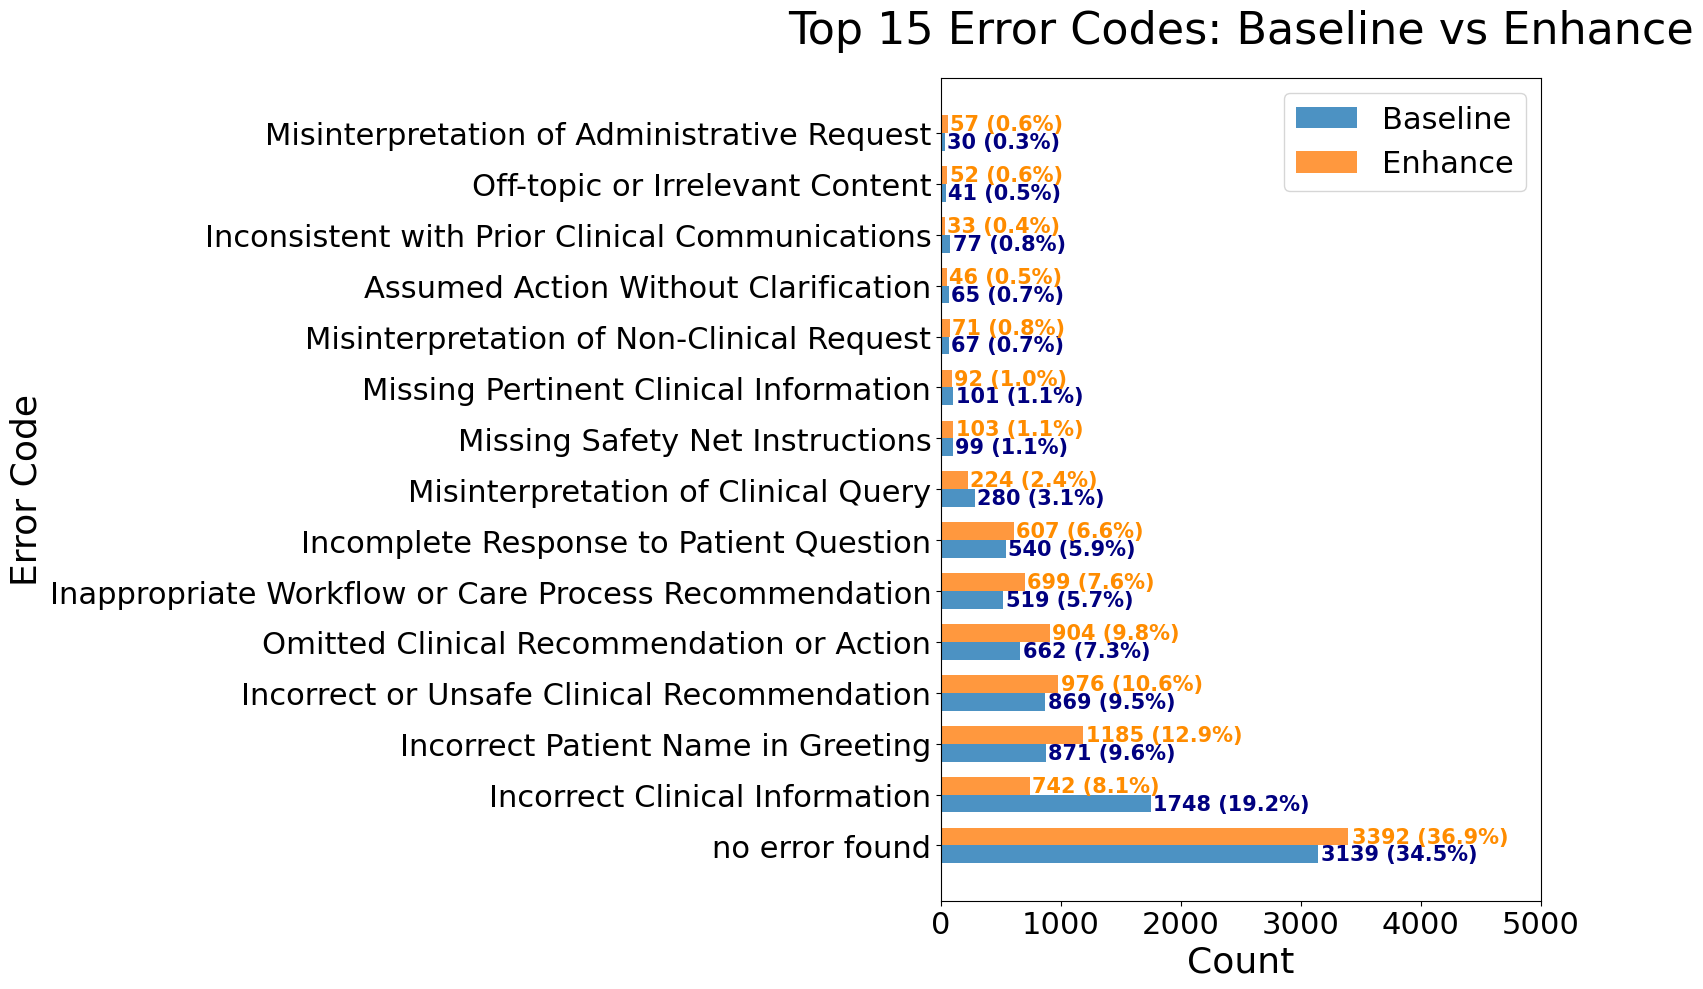

In [56]:

# Get top 15 error codes across both
counts_baseline = merged_df_comparison['Dedup Error Code_baseline'].value_counts()
counts_enhance  = merged_df_comparison['Dedup Error Code_enhance'].value_counts()
all_codes = counts_baseline.add(counts_enhance, fill_value=0)
top_15_codes = all_codes.nlargest(15).index

counts_baseline_top15 = counts_baseline.reindex(top_15_codes, fill_value=0)
counts_enhance_top15  = counts_enhance.reindex(top_15_codes, fill_value=0)

y = range(len(top_15_codes))
height = 0.35

# Totals for percent
total_baseline = counts_baseline_top15.sum()
total_enhance  = counts_enhance_top15.sum()

fig, ax = plt.subplots(figsize=(16, 10))
bars1 = ax.barh([i - height/2 for i in y], counts_baseline_top15.values, height, label='Baseline', alpha=0.8)
bars2 = ax.barh([i + height/2 for i in y], counts_enhance_top15.values,  height, label='Enhance',  alpha=0.8)

ax.set_ylabel('Error Code', fontsize=26)
ax.set_xlabel('Count', fontsize=26)
ax.set_title('Top 15 Error Codes: Baseline vs Enhance', fontsize=32, pad=25)
ax.set_yticks(y)
ax.set_yticklabels(top_15_codes, fontsize=22)
ax.tick_params(axis='x', labelsize=22)
ax.legend(fontsize=22)

# Add count and percentage on bars (right side)
for i, bar in enumerate(bars1):
    width = bar.get_width()
    percent = (width / total_baseline) * 100 if total_baseline > 0 else 0
    if width > 0:
        ax.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2):
    width = bar.get_width()
    percent = (width / total_enhance) * 100 if total_enhance > 0 else 0
    if width > 0:
        ax.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='darkorange')
plt.xlim(0,5000)
plt.tight_layout()
plt.show()


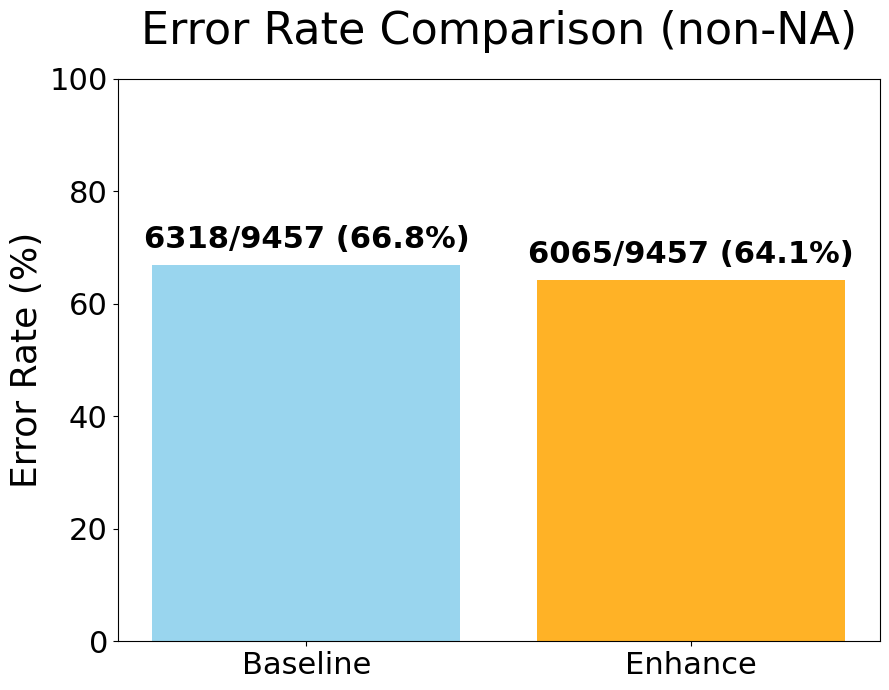

In [57]:


na_baseline = (merged_df_comparison["Dedup Error Code_baseline"] == "no error found").mean() * 100
na_enhance  = (merged_df_comparison["Dedup Error Code_enhance"]  == "no error found").mean() * 100
non_na_rate_baseline = 100 - na_baseline
non_na_rate_enhance  = 100 - na_enhance

count_baseline = (merged_df_comparison["Dedup Error Code_baseline"] != "no error found").sum()
count_enhance  = (merged_df_comparison["Dedup Error Code_enhance"]  != "no error found").sum()
total_baseline = len(merged_df_comparison)
total_enhance  = len(merged_df_comparison)

fig, ax = plt.subplots(figsize=(9, 7))
groups = ['Baseline', 'Enhance']
rates = [non_na_rate_baseline, non_na_rate_enhance]
counts = [count_baseline, count_enhance]
bars = ax.bar(groups, rates, color=['skyblue', 'orange'], alpha=0.85)

for i, bar in enumerate(bars):
    height = bar.get_height()
    count = counts[i]
    percent = rates[i]
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{int(count)}/{total_baseline} ({percent:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=22, color='black')

ax.set_ylabel('Error Rate (%)', fontsize=26)
ax.set_title('Error Rate Comparison (non-NA)', fontsize=32, pad=25)
ax.set_ylim(0, 100)
ax.tick_params(axis='y', labelsize=22)
ax.tick_params(axis='x', labelsize=22)

plt.tight_layout()
plt.show()


In [ ]:
merged_df_comparison

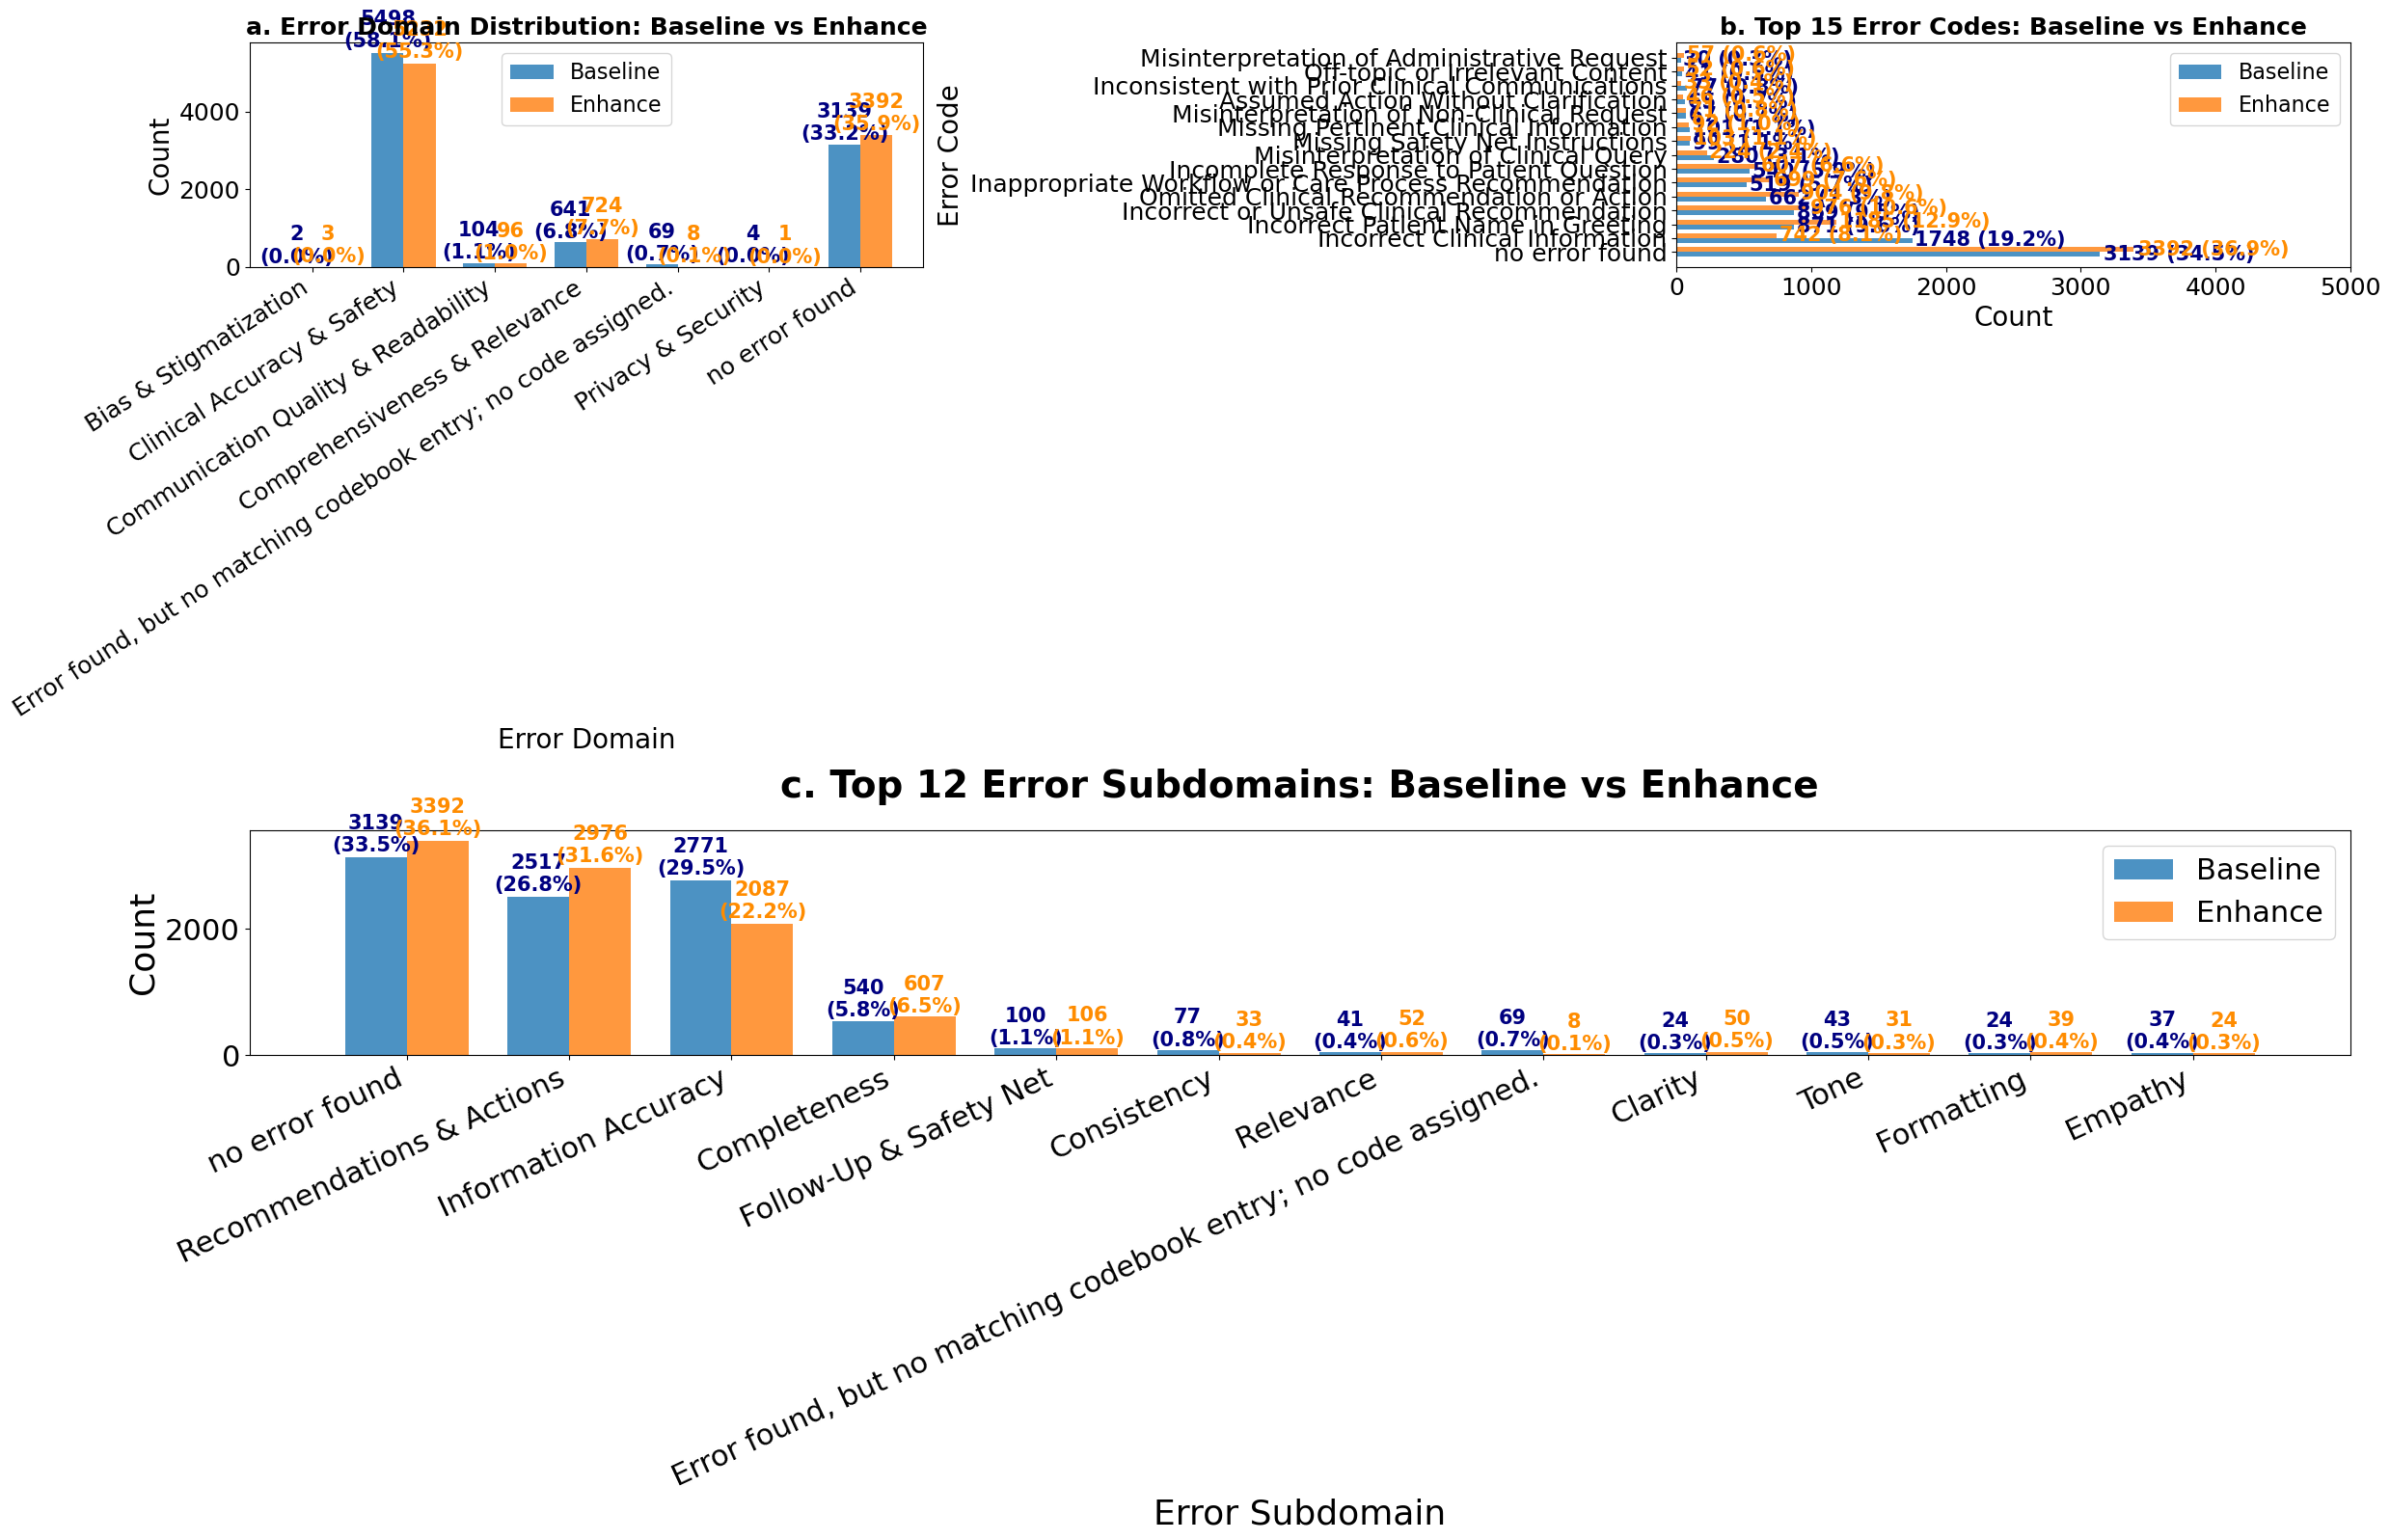

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig = plt.figure(figsize=(24, 16))

# Top left: Domain distribution
ax1 = plt.subplot(2, 2, 1)
counts_baseline_domain = merged_df_comparison['Domain_baseline'].value_counts()
counts_enhance_domain = merged_df_comparison['Domain_enhance'].value_counts()

# Drop "NEW1"
counts_baseline_domain = counts_baseline_domain.drop("NEW1", errors="ignore")
counts_enhance_domain = counts_enhance_domain.drop("NEW1", errors="ignore")

# Unique domains (no NEW1)
all_domains = sorted(set(counts_baseline_domain.index) | set(counts_enhance_domain.index))
counts_baseline_domain = counts_baseline_domain.reindex(all_domains, fill_value=0)
counts_enhance_domain = counts_enhance_domain.reindex(all_domains, fill_value=0)

# For percentage
total_baseline_domain = counts_baseline_domain.sum()
total_enhance_domain = counts_enhance_domain.sum()

x_domain = range(len(all_domains))
width_domain = 0.35

bars1_domain = ax1.bar([i - width_domain/2 for i in x_domain], counts_baseline_domain.values, width_domain, label='Baseline', alpha=0.8)
bars2_domain = ax1.bar([i + width_domain/2 for i in x_domain], counts_enhance_domain.values, width_domain, label='Enhance', alpha=0.8)

ax1.set_xlabel('Error Domain', fontsize=20)
ax1.set_ylabel('Count', fontsize=20)
ax1.set_title('a. Error Domain Distribution: Baseline vs Enhance', fontsize=18, fontweight='bold')
ax1.set_xticks(x_domain)
ax1.set_xticklabels(all_domains, rotation=33, ha='right', fontsize=18)
ax1.legend(fontsize=16)
ax1.tick_params(axis='y', labelsize=18)

# Add count and percentage labels
for i, bar in enumerate(bars1_domain):
    height = bar.get_height()
    percent = (height / total_baseline_domain) * 100 if total_baseline_domain > 0 else 0
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(8, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2_domain):
    height = bar.get_height()
    percent = (height / total_enhance_domain) * 100 if total_enhance_domain > 0 else 0
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(8, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='darkorange')

# Top right: Error codes distribution
ax2 = plt.subplot(2, 2, 2)
counts_baseline_codes = merged_df_comparison['Dedup Error Code_baseline'].value_counts()
counts_enhance_codes = merged_df_comparison['Dedup Error Code_enhance'].value_counts()
all_codes = counts_baseline_codes.add(counts_enhance_codes, fill_value=0)
top_15_codes = all_codes.nlargest(15).index

counts_baseline_top15 = counts_baseline_codes.reindex(top_15_codes, fill_value=0)
counts_enhance_top15 = counts_enhance_codes.reindex(top_15_codes, fill_value=0)

y_codes = range(len(top_15_codes))
height_codes = 0.35

# Totals for percent
total_baseline_codes = counts_baseline_top15.sum()
total_enhance_codes = counts_enhance_top15.sum()

bars1_codes = ax2.barh([i - height_codes/2 for i in y_codes], counts_baseline_top15.values, height_codes, label='Baseline', alpha=0.8)
bars2_codes = ax2.barh([i + height_codes/2 for i in y_codes], counts_enhance_top15.values, height_codes, label='Enhance', alpha=0.8)

ax2.set_ylabel('Error Code', fontsize=20)
ax2.set_xlabel('Count', fontsize=20)
ax2.set_title('b. Top 15 Error Codes: Baseline vs Enhance', fontsize=18, fontweight='bold')
ax2.set_yticks(y_codes)
ax2.set_yticklabels(top_15_codes, fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.legend(fontsize=16)
ax2.set_xlim(0, 5000)

# Add count and percentage on bars (right side)
for i, bar in enumerate(bars1_codes):
    width = bar.get_width()
    percent = (width / total_baseline_codes) * 100 if total_baseline_codes > 0 else 0
    if width > 0:
        ax2.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2_codes):
    width = bar.get_width()
    percent = (width / total_enhance_codes) * 100 if total_enhance_codes > 0 else 0
    if width > 0:
        ax2.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='darkorange')

# Bottom panel: Subdomain distribution (larger fonts)
ax3 = plt.subplot(2, 1, 2)
N = 12
counts_baseline_subdomain = merged_df_comparison['Subdomain_baseline'].value_counts()
counts_enhance_subdomain = merged_df_comparison['Subdomain_enhance'].value_counts()
counts_baseline_subdomain = counts_baseline_subdomain.drop("NEW1", errors="ignore")
counts_enhance_subdomain = counts_enhance_subdomain.drop("NEW1", errors="ignore")
all_counts_subdomain = counts_baseline_subdomain.add(counts_enhance_subdomain, fill_value=0)
topN_subdomains = all_counts_subdomain.nlargest(N).index.tolist()

# Align and select only the top N
counts_baseline_subdomain = counts_baseline_subdomain.reindex(topN_subdomains, fill_value=0)
counts_enhance_subdomain = counts_enhance_subdomain.reindex(topN_subdomains, fill_value=0)
total_baseline_subdomain = counts_baseline_subdomain.sum()
total_enhance_subdomain = counts_enhance_subdomain.sum()

x_subdomain = np.arange(N)
width_subdomain = 0.38

bars1_subdomain = ax3.bar(x_subdomain - width_subdomain/2, counts_baseline_subdomain.values, width_subdomain, label='Baseline', alpha=0.8)
bars2_subdomain = ax3.bar(x_subdomain + width_subdomain/2, counts_enhance_subdomain.values, width_subdomain, label='Enhance', alpha=0.8)

ax3.set_xlabel('Error Subdomain', fontsize=26)
ax3.set_ylabel('Count', fontsize=26)
ax3.set_title(f'c. Top {N} Error Subdomains: Baseline vs Enhance', fontsize=28, pad=25, fontweight='bold')
ax3.set_xticks(x_subdomain)
ax3.set_xticklabels(topN_subdomains, rotation=25, ha='right', fontsize=22)
ax3.legend(fontsize=22)
ax3.tick_params(axis='y', labelsize=22)

for i, bar in enumerate(bars1_subdomain):
    height = bar.get_height()
    percent = (height / total_baseline_subdomain) * 100 if total_baseline_subdomain > 0 else 0
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + max(6, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2_subdomain):
    height = bar.get_height()
    percent = (height / total_enhance_subdomain) * 100 if total_enhance_subdomain > 0 else 0
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + max(6, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='darkorange')

plt.tight_layout()
plt.show()

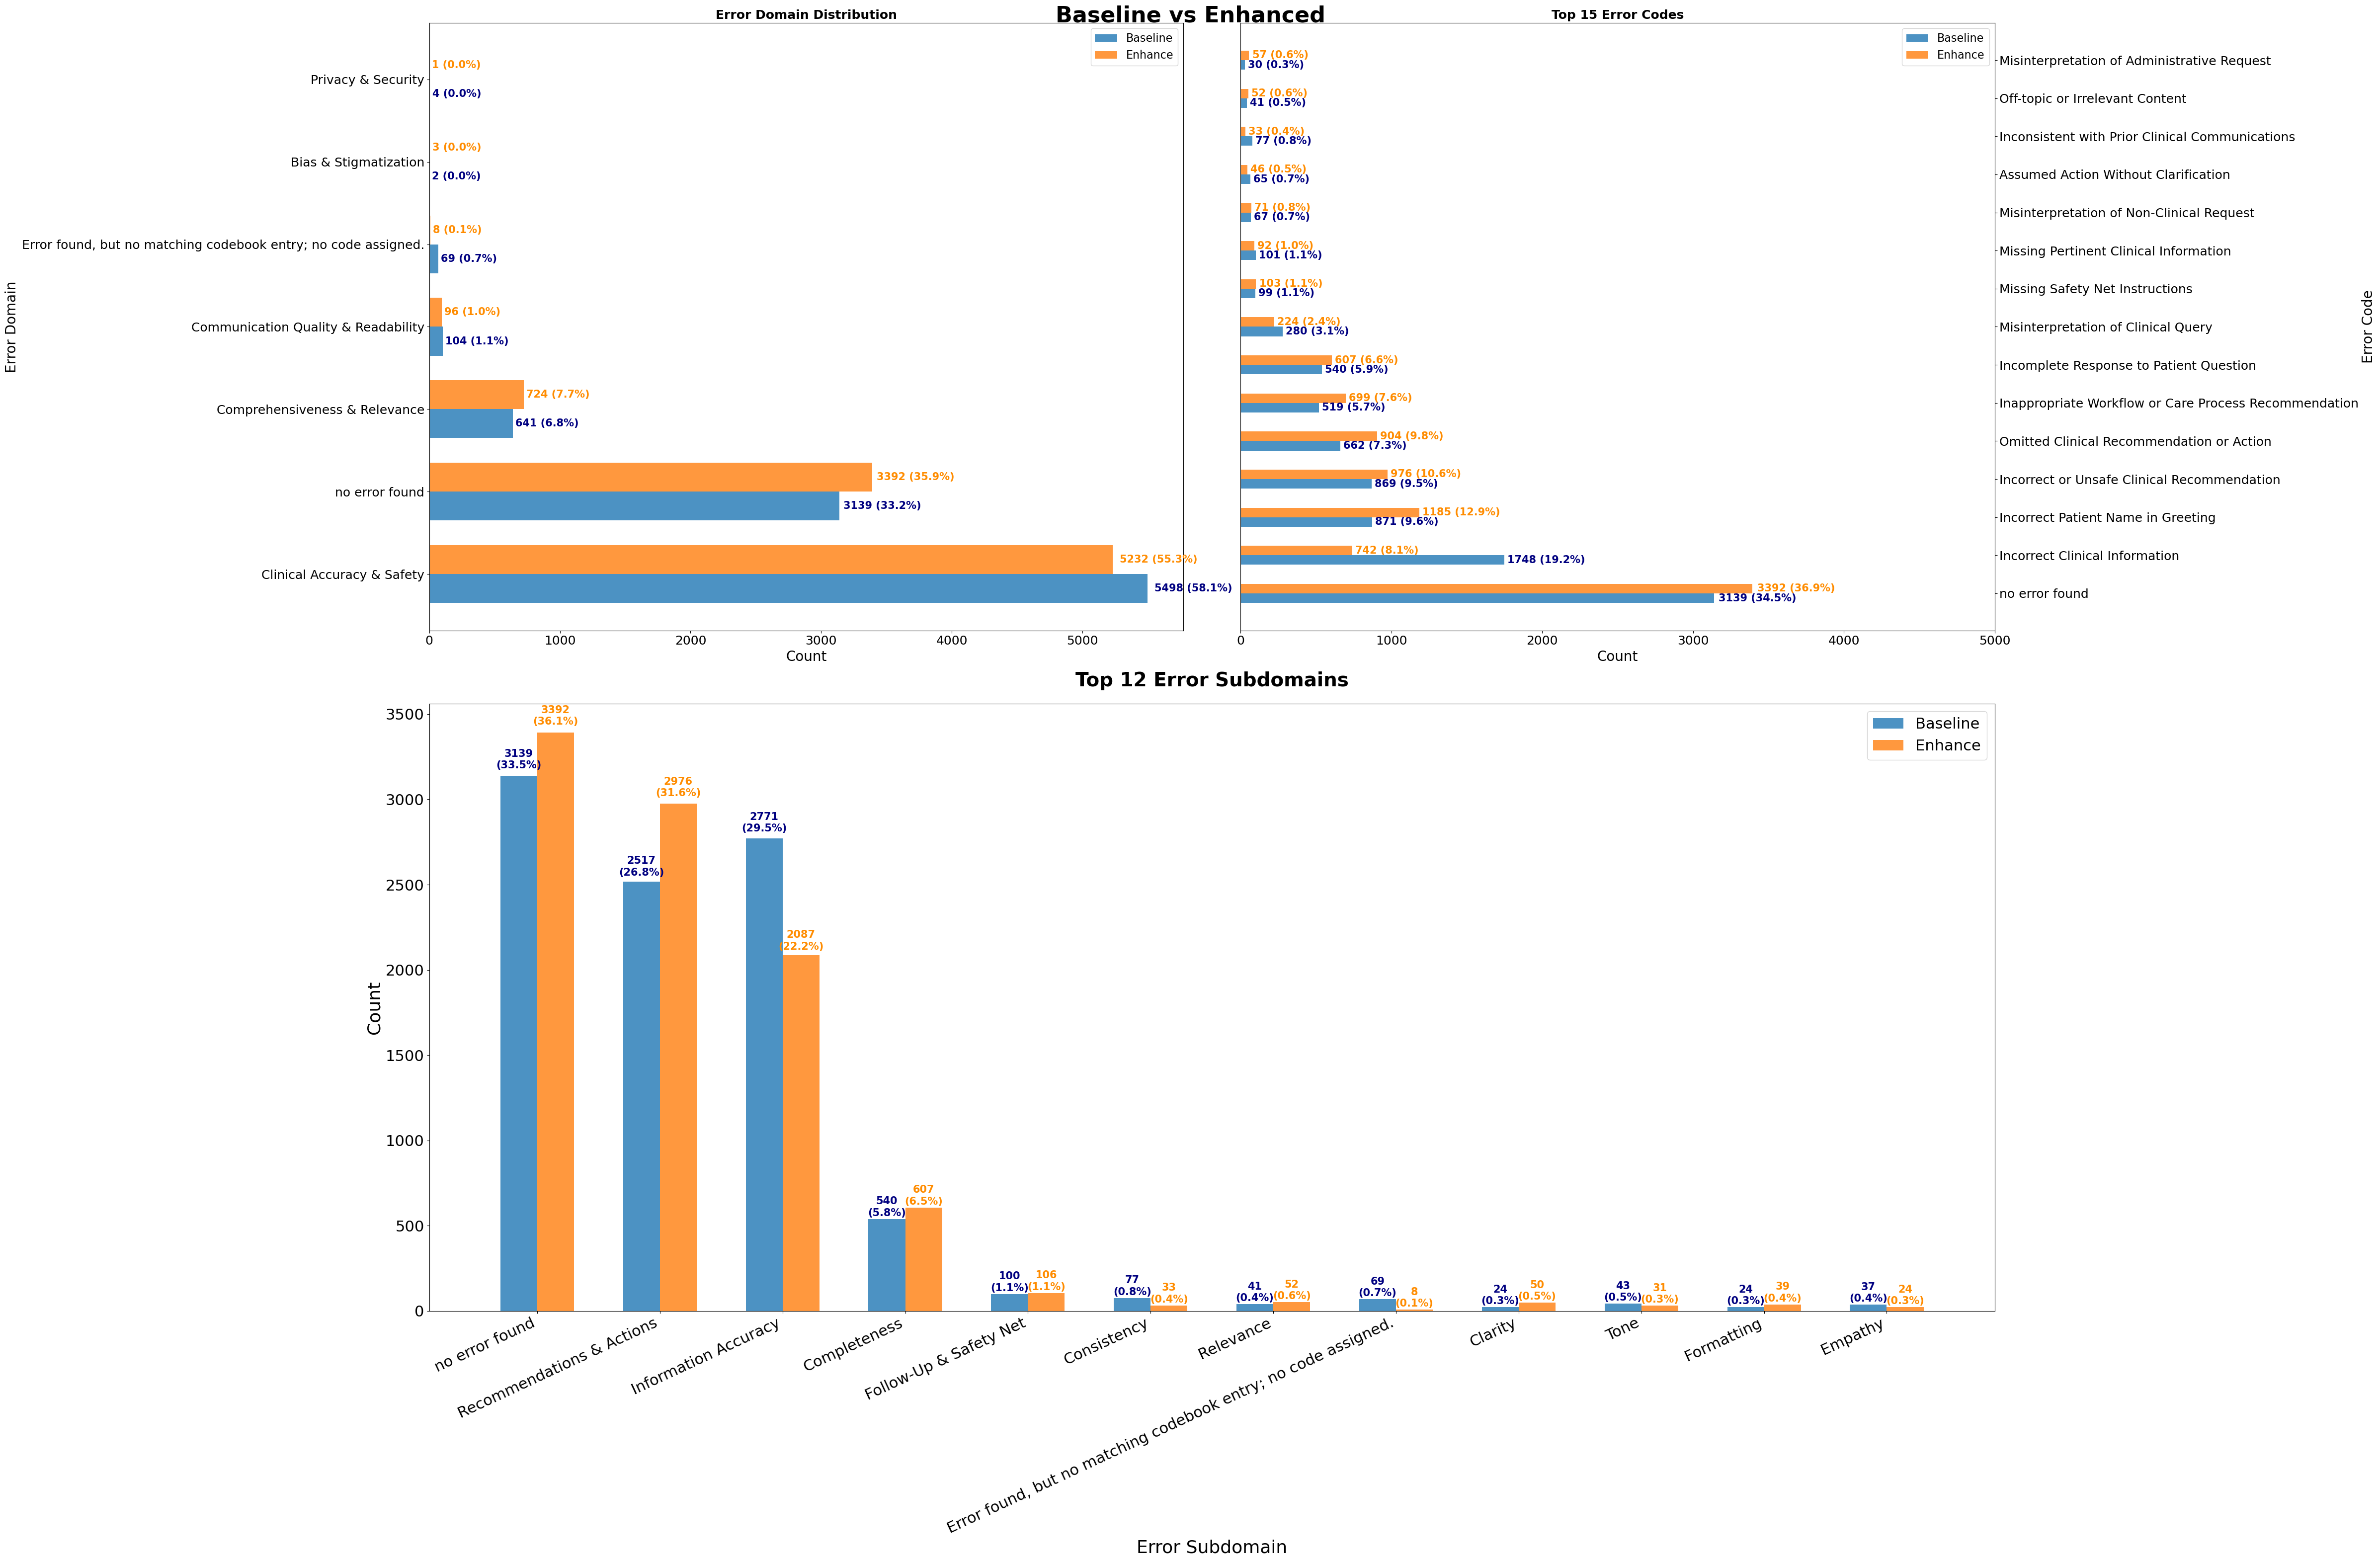

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig = plt.figure(figsize=(48, 32))

# Add main title
fig.suptitle('Baseline vs Enhanced', fontsize=32, fontweight='bold', y=0.98)

# Top left: Domain distribution (horizontal bars, sorted)
ax1 = plt.subplot(2, 2, 1)
counts_baseline_domain = merged_df_comparison['Domain_baseline'].value_counts()
counts_enhance_domain = merged_df_comparison['Domain_enhance'].value_counts()

# Drop "NEW1"
counts_baseline_domain = counts_baseline_domain.drop("NEW1", errors="ignore")
counts_enhance_domain = counts_enhance_domain.drop("NEW1", errors="ignore")

# Get total counts for sorting
all_domains_total = counts_baseline_domain.add(counts_enhance_domain, fill_value=0)
# Sort domains by total count (high to low)
sorted_domains = all_domains_total.sort_values(ascending=False).index.tolist()

# Reindex with sorted order
counts_baseline_domain = counts_baseline_domain.reindex(sorted_domains, fill_value=0)
counts_enhance_domain = counts_enhance_domain.reindex(sorted_domains, fill_value=0)

# For percentage
total_baseline_domain = counts_baseline_domain.sum()
total_enhance_domain = counts_enhance_domain.sum()

y_domain = range(len(sorted_domains))
height_domain = 0.35

bars1_domain = ax1.barh([i - height_domain/2 for i in y_domain], counts_baseline_domain.values, height_domain, label='Baseline', alpha=0.8)
bars2_domain = ax1.barh([i + height_domain/2 for i in y_domain], counts_enhance_domain.values, height_domain, label='Enhance', alpha=0.8)

ax1.set_ylabel('Error Domain', fontsize=20)
ax1.set_xlabel('Count', fontsize=20)
ax1.set_title('Error Domain Distribution', fontsize=18, fontweight='bold')
ax1.set_yticks(y_domain)
ax1.set_yticklabels(sorted_domains, fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.legend(fontsize=16)

# Add count and percentage labels (right side)
for i, bar in enumerate(bars1_domain):
    width = bar.get_width()
    percent = (width / total_baseline_domain) * 100 if total_baseline_domain > 0 else 0
    if width > 0:
        ax1.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2_domain):
    width = bar.get_width()
    percent = (width / total_enhance_domain) * 100 if total_enhance_domain > 0 else 0
    if width > 0:
        ax1.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='darkorange')

# Top right: Error codes distribution (y-axis labels on the right, more spacing)
ax2 = plt.subplot(2, 2, 2)
counts_baseline_codes = merged_df_comparison['Dedup Error Code_baseline'].value_counts()
counts_enhance_codes = merged_df_comparison['Dedup Error Code_enhance'].value_counts()
all_codes = counts_baseline_codes.add(counts_enhance_codes, fill_value=0)
top_15_codes = all_codes.nlargest(15).index

counts_baseline_top15 = counts_baseline_codes.reindex(top_15_codes, fill_value=0)
counts_enhance_top15 = counts_enhance_codes.reindex(top_15_codes, fill_value=0)

y_codes = range(len(top_15_codes))
height_codes = 0.25  # Reduced height for more spacing

# Totals for percent
total_baseline_codes = counts_baseline_top15.sum()
total_enhance_codes = counts_enhance_top15.sum()

bars1_codes = ax2.barh([i - height_codes/2 for i in y_codes], counts_baseline_top15.values, height_codes, label='Baseline', alpha=0.8)
bars2_codes = ax2.barh([i + height_codes/2 for i in y_codes], counts_enhance_top15.values, height_codes, label='Enhance', alpha=0.8)

ax2.set_ylabel('Error Code', fontsize=20)
ax2.set_xlabel('Count', fontsize=20)
ax2.set_title('Top 15 Error Codes', fontsize=18, fontweight='bold')
ax2.set_yticks(y_codes)
ax2.set_yticklabels(top_15_codes, fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.legend(fontsize=16)
ax2.set_xlim(0, 5000)

# Move y-axis labels to the right
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()

# Add count and percentage on bars (left side since y-axis is now on right)
for i, bar in enumerate(bars1_codes):
    width = bar.get_width()
    percent = (width / total_baseline_codes) * 100 if total_baseline_codes > 0 else 0
    if width > 0:
        ax2.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2_codes):
    width = bar.get_width()
    percent = (width / total_enhance_codes) * 100 if total_enhance_codes > 0 else 0
    if width > 0:
        ax2.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='darkorange')

# Bottom panel: Subdomain distribution (larger fonts, more spacing)
ax3 = plt.subplot(2, 1, 2)
N = 12
counts_baseline_subdomain = merged_df_comparison['Subdomain_baseline'].value_counts()
counts_enhance_subdomain = merged_df_comparison['Subdomain_enhance'].value_counts()
counts_baseline_subdomain = counts_baseline_subdomain.drop("NEW1", errors="ignore")
counts_enhance_subdomain = counts_enhance_subdomain.drop("NEW1", errors="ignore")
all_counts_subdomain = counts_baseline_subdomain.add(counts_enhance_subdomain, fill_value=0)
topN_subdomains = all_counts_subdomain.nlargest(N).index.tolist()

# Align and select only the top N
counts_baseline_subdomain = counts_baseline_subdomain.reindex(topN_subdomains, fill_value=0)
counts_enhance_subdomain = counts_enhance_subdomain.reindex(topN_subdomains, fill_value=0)
total_baseline_subdomain = counts_baseline_subdomain.sum()
total_enhance_subdomain = counts_enhance_subdomain.sum()

x_subdomain = np.arange(N)
width_subdomain = 0.3  # Reduced width for more spacing

bars1_subdomain = ax3.bar(x_subdomain - width_subdomain/2, counts_baseline_subdomain.values, width_subdomain, label='Baseline', alpha=0.8)
bars2_subdomain = ax3.bar(x_subdomain + width_subdomain/2, counts_enhance_subdomain.values, width_subdomain, label='Enhance', alpha=0.8)

ax3.set_xlabel('Error Subdomain', fontsize=26)
ax3.set_ylabel('Count', fontsize=26)
ax3.set_title(f'Top {N} Error Subdomains', fontsize=28, pad=25, fontweight='bold')
ax3.set_xticks(x_subdomain)
ax3.set_xticklabels(topN_subdomains, rotation=25, ha='right', fontsize=22)
ax3.legend(fontsize=22)
ax3.tick_params(axis='y', labelsize=22)

for i, bar in enumerate(bars1_subdomain):
    height = bar.get_height()
    percent = (height / total_baseline_subdomain) * 100 if total_baseline_subdomain > 0 else 0
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + max(6, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2_subdomain):
    height = bar.get_height()
    percent = (height / total_enhance_subdomain) * 100 if total_enhance_subdomain > 0 else 0
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + max(6, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=15, color='darkorange')

plt.tight_layout()
plt.show()

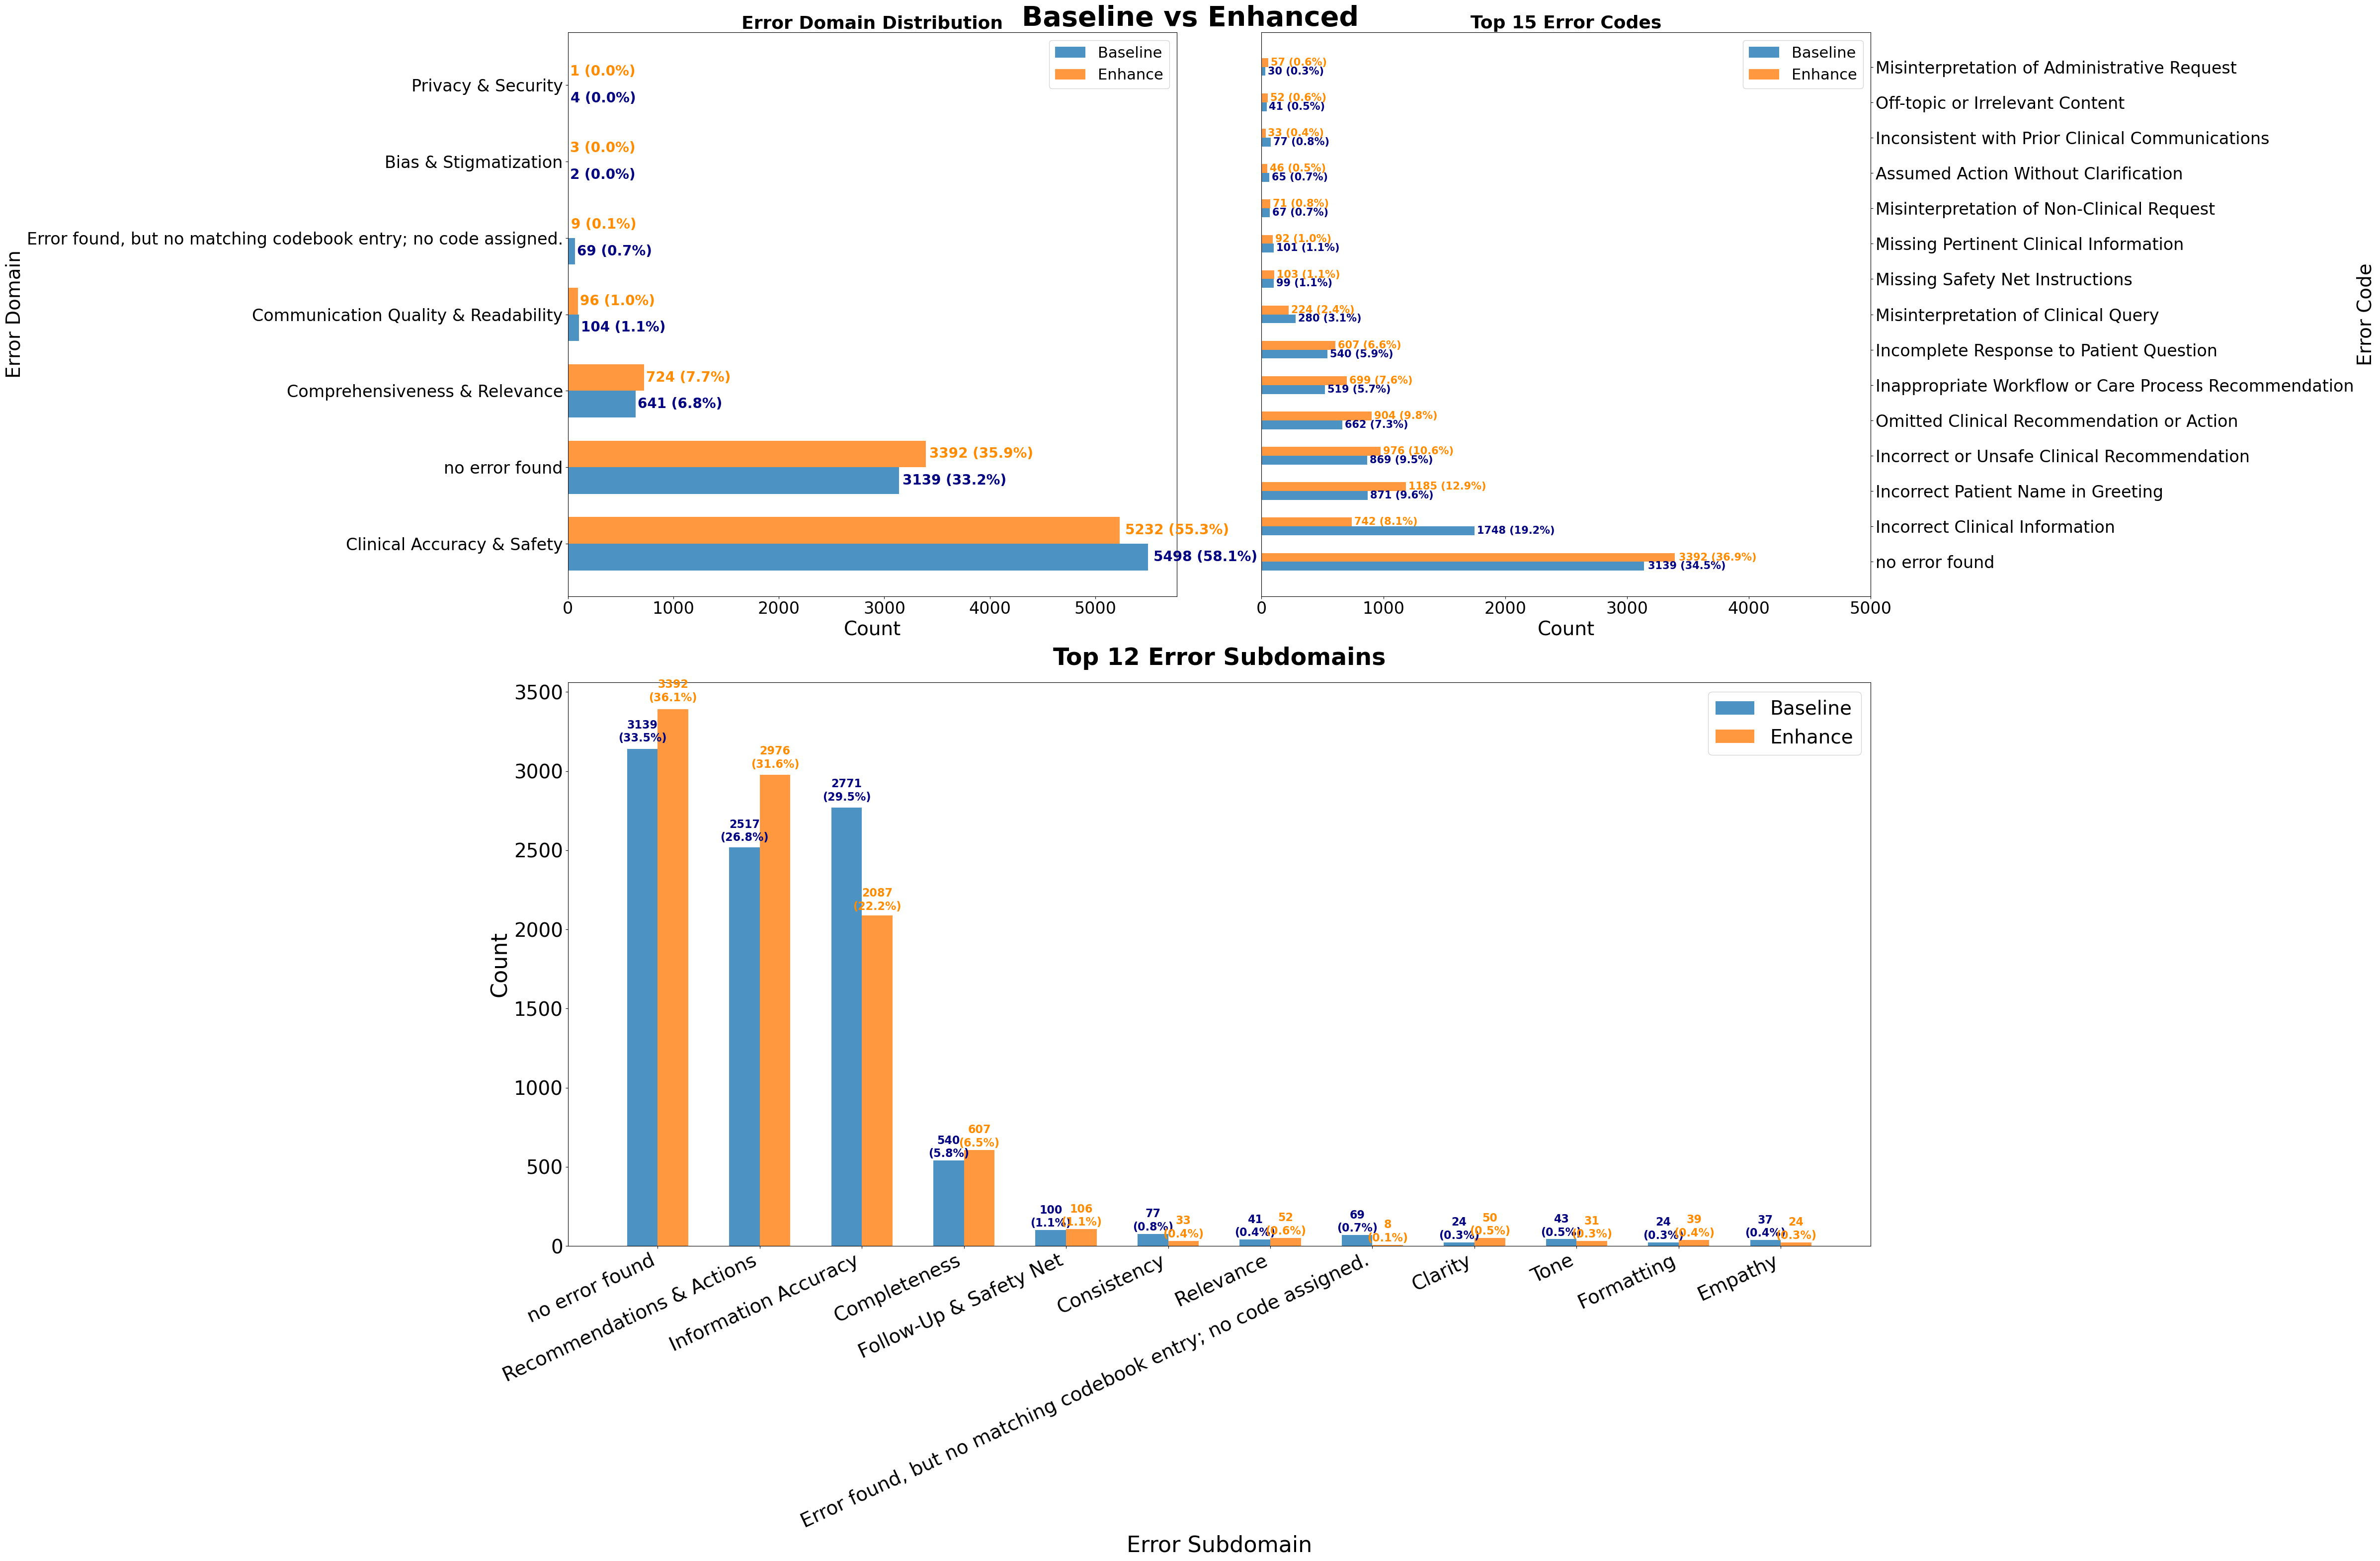

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig = plt.figure(figsize=(48, 32))

# Add main title
fig.suptitle('Baseline vs Enhanced', fontsize=40, fontweight='bold', y=0.98)

# Top left: Domain distribution (horizontal bars, sorted)
ax1 = plt.subplot(2, 2, 1)
counts_baseline_domain = merged_df_comparison['Domain_baseline'].value_counts()
counts_enhance_domain = merged_df_comparison['Domain_enhance'].value_counts()

# Reclassify "NEW1" instead of dropping - handle duplicates by combining them
new_label = "Error found, but no matching codebook entry; no code assigned."

# Handle baseline
if "NEW1" in counts_baseline_domain.index:
    if new_label in counts_baseline_domain.index:
        counts_baseline_domain[new_label] += counts_baseline_domain["NEW1"]
        counts_baseline_domain = counts_baseline_domain.drop("NEW1")
    else:
        counts_baseline_domain = counts_baseline_domain.rename({"NEW1": new_label})

# Handle enhance
if "NEW1" in counts_enhance_domain.index:
    if new_label in counts_enhance_domain.index:
        counts_enhance_domain[new_label] += counts_enhance_domain["NEW1"]
        counts_enhance_domain = counts_enhance_domain.drop("NEW1")
    else:
        counts_enhance_domain = counts_enhance_domain.rename({"NEW1": new_label})

# Get total counts for sorting
all_domains_total = counts_baseline_domain.add(counts_enhance_domain, fill_value=0)
# Sort domains by total count (high to low)
sorted_domains = all_domains_total.sort_values(ascending=False).index.tolist()

# Reindex with sorted order
counts_baseline_domain = counts_baseline_domain.reindex(sorted_domains, fill_value=0)
counts_enhance_domain = counts_enhance_domain.reindex(sorted_domains, fill_value=0)

# For percentage
total_baseline_domain = counts_baseline_domain.sum()
total_enhance_domain = counts_enhance_domain.sum()

y_domain = range(len(sorted_domains))
height_domain = 0.35

bars1_domain = ax1.barh([i - height_domain/2 for i in y_domain], counts_baseline_domain.values, height_domain, label='Baseline', alpha=0.8)
bars2_domain = ax1.barh([i + height_domain/2 for i in y_domain], counts_enhance_domain.values, height_domain, label='Enhance', alpha=0.8)

ax1.set_ylabel('Error Domain', fontsize=28)
ax1.set_xlabel('Count', fontsize=28)
ax1.set_title('Error Domain Distribution', fontsize=26, fontweight='bold')
ax1.set_yticks(y_domain)
ax1.set_yticklabels(sorted_domains, fontsize=24)
ax1.tick_params(axis='x', labelsize=24)
ax1.legend(fontsize=22)

# Add count and percentage labels (right side)
for i, bar in enumerate(bars1_domain):
    width = bar.get_width()
    percent = (width / total_baseline_domain) * 100 if total_baseline_domain > 0 else 0
    if width > 0:
        ax1.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=20, color='navy')

for i, bar in enumerate(bars2_domain):
    width = bar.get_width()
    percent = (width / total_enhance_domain) * 100 if total_enhance_domain > 0 else 0
    if width > 0:
        ax1.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=20, color='darkorange')

# Top right: Error codes distribution (y-axis labels on the right, more spacing)
ax2 = plt.subplot(2, 2, 2)
counts_baseline_codes = merged_df_comparison['Dedup Error Code_baseline'].value_counts()
counts_enhance_codes = merged_df_comparison['Dedup Error Code_enhance'].value_counts()

# Get total counts for sorting
all_codes_total = counts_baseline_codes.add(counts_enhance_codes, fill_value=0)
# Sort codes by total count (high to low) and get top 15
sorted_codes = all_codes_total.sort_values(ascending=False).head(15).index.tolist()

counts_baseline_top15 = counts_baseline_codes.reindex(sorted_codes, fill_value=0)
counts_enhance_top15 = counts_enhance_codes.reindex(sorted_codes, fill_value=0)

y_codes = range(len(sorted_codes))
height_codes = 0.25  # Reduced height for more spacing

# Totals for percent
total_baseline_codes = counts_baseline_top15.sum()
total_enhance_codes = counts_enhance_top15.sum()

bars1_codes = ax2.barh([i - height_codes/2 for i in y_codes], counts_baseline_top15.values, height_codes, label='Baseline', alpha=0.8)
bars2_codes = ax2.barh([i + height_codes/2 for i in y_codes], counts_enhance_top15.values, height_codes, label='Enhance', alpha=0.8)

ax2.set_ylabel('Error Code', fontsize=28)
ax2.set_xlabel('Count', fontsize=28)
ax2.set_title('Top 15 Error Codes', fontsize=26, fontweight='bold')
ax2.set_yticks(y_codes)
ax2.set_yticklabels(sorted_codes, fontsize=24)
ax2.tick_params(axis='x', labelsize=24)
ax2.legend(fontsize=22)
ax2.set_xlim(0, 5000)

# Move y-axis labels to the right
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()

# Add count and percentage on bars (left side since y-axis is now on right)
for i, bar in enumerate(bars1_codes):
    width = bar.get_width()
    percent = (width / total_baseline_codes) * 100 if total_baseline_codes > 0 else 0
    if width > 0:
        ax2.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='navy')

for i, bar in enumerate(bars2_codes):
    width = bar.get_width()
    percent = (width / total_enhance_codes) * 100 if total_enhance_codes > 0 else 0
    if width > 0:
        ax2.text(width + max(20, width*0.01), bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({percent:.1f}%)',
                ha='left', va='center', fontweight='bold', fontsize=15, color='darkorange')

# Bottom panel: Subdomain distribution (larger fonts, more spacing)
ax3 = plt.subplot(2, 1, 2)
N = 12
counts_baseline_subdomain = merged_df_comparison['Subdomain_baseline'].value_counts()
counts_enhance_subdomain = merged_df_comparison['Subdomain_enhance'].value_counts()

# Reclassify "NEW1" instead of dropping - handle duplicates by combining them
# Handle baseline subdomain
if "NEW1" in counts_baseline_subdomain.index:
    if new_label in counts_baseline_subdomain.index:
        counts_baseline_subdomain[new_label] += counts_baseline_subdomain["NEW1"]
        counts_baseline_subdomain = counts_baseline_subdomain.drop("NEW1")
    else:
        counts_baseline_subdomain = counts_baseline_subdomain.rename({"NEW1": new_label})

# Handle enhance subdomain
if "NEW1" in counts_enhance_subdomain.index:
    if new_label in counts_enhance_subdomain.index:
        counts_enhance_subdomain[new_label] += counts_enhance_subdomain["NEW1"]
        counts_enhance_subdomain = counts_enhance_subdomain.drop("NEW1")
    else:
        counts_enhance_subdomain = counts_enhance_subdomain.rename({"NEW1": new_label})

# Get total counts for sorting
all_subdomains_total = counts_baseline_subdomain.add(counts_enhance_subdomain, fill_value=0)
# Sort subdomains by total count (high to low) and get top N
sorted_subdomains = all_subdomains_total.sort_values(ascending=False).head(N).index.tolist()

# Align and select only the top N
counts_baseline_subdomain = counts_baseline_subdomain.reindex(sorted_subdomains, fill_value=0)
counts_enhance_subdomain = counts_enhance_subdomain.reindex(sorted_subdomains, fill_value=0)
total_baseline_subdomain = counts_baseline_subdomain.sum()
total_enhance_subdomain = counts_enhance_subdomain.sum()

x_subdomain = np.arange(N)
width_subdomain = 0.3  # Reduced width for more spacing

bars1_subdomain = ax3.bar(x_subdomain - width_subdomain/2, counts_baseline_subdomain.values, width_subdomain, label='Baseline', alpha=0.8)
bars2_subdomain = ax3.bar(x_subdomain + width_subdomain/2, counts_enhance_subdomain.values, width_subdomain, label='Enhance', alpha=0.8)

ax3.set_xlabel('Error Subdomain', fontsize=32)
ax3.set_ylabel('Count', fontsize=32)
ax3.set_title(f'Top {N} Error Subdomains', fontsize=34, pad=25, fontweight='bold')
ax3.set_xticks(x_subdomain)
ax3.set_xticklabels(sorted_subdomains, rotation=25, ha='right', fontsize=28)
ax3.legend(fontsize=28)
ax3.tick_params(axis='y', labelsize=28)

for i, bar in enumerate(bars1_subdomain):
    height = bar.get_height()
    percent = (height / total_baseline_subdomain) * 100 if total_baseline_subdomain > 0 else 0
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + max(6, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=16, color='navy')

for i, bar in enumerate(bars2_subdomain):
    height = bar.get_height()
    percent = (height / total_enhance_subdomain) * 100 if total_enhance_subdomain > 0 else 0
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + max(6, height*0.01),
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=16, color='darkorange')

plt.tight_layout()
plt.show()